In [2]:
%cd /home/smlm-workstation/event-smlm/event-smlm-thesis/
# from commonFunctions import *
from localization_scripts.generate_image import neighbor_interpolation, histogram_binning
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
np.set_printoptions(suppress=True)

/home/smlm-workstation/event-smlm/event-smlm-thesis


## Variable initialisation

In [3]:
# %cd /home/smlm-workstation/event-smlm/Paris/MT_CL/
# %cd /home/smlm-workstation/event-smlm/Paris/CL/
# %cd /home/smlm-workstation/event-smlm/Paris/MT/
%cd /home/smlm-workstation/event-smlm/our_ev_smlm_recordings/MT_CL_06_08/

# filename = '/home/smlm-workstation/event-smlm/Paris/25.05/CL/recording_2023-05-25T08-32-14.720Z/localizations_prominence_fwhm_7_prominence_13.npy' # good
# filename = '/home/smlm-workstation/event-smlm/generated_data/localizations/our_samples/MT_5May_S2_reduced_bias_580secsample3_gaus+phasor.npy'
# filename = '/home/smlm-workstation/event-smlm/our_ev_smlm_recordings/MT_5May_S2_reduced_bias_580sec/localizations_sample3_gauss+phasor_prominence_12.npy'

# filename = '/home/smlm-workstation/event-smlm/Paris/TubulinAF647/recording_2023-05-22T11-51-48.153Z/localizations_prominence_25.npy'
# filename = '/home/smlm-workstation/event-smlm/Paris/TubulinAF647/recording_2023-05-22T11-51-48.153Z/localizations_prominence_20.npy'

# filename = '/home/smlm-workstation/event-smlm/Paris/Tubulin+Clqthrin/recording_2023-05-22T13-04-01.505Z/localizations_prominence_16.npy'

# filename = '/home/smlm-workstation/event-smlm/Paris/24.05/MT/recording_2023-05-24T09-12-08.025Z/localizations_prominence_fwhm_7_prominence_12.npy' # lots of out of focus
# filename = '/home/smlm-workstation/event-smlm/Paris/24.05/MT/recording_2023-05-24T09-33-27.882Z/localizations_prominence_fwhm_7_prominence_12.npy' 

# filename = 'recording_2023-05-25T08-32-14.720Z/localizations_prominence_fwhm_7_prominence_13.npy' # good
# filename = 'recording_2023-05-25T07-36-15.688Z/localizations_prominence_fwhm_8_prominence_8.npy' # good
# filename = 'recording_2023-05-25T07-55-35.934Z/localizations_prominence_fwhm_6_prominence_13.npy' # good
# filename = 'recording_2023-05-25T08-13-04.087Z/localizations_prominence_fwhm_6_prominence_13.npy' # good

# filename = 'recording_2023-05-22T11-51-48.153Z/localizations_prominence_fwhm_8_prominence_10.npy' # good
# filename = 'recording_2023-05-22T12-11-48.297Z/localizations_prominence_fwhm_8_prominence_10.npy' # good
# filename = 'recording_2023-05-22T12-29-08.374Z/localizations_prominence_fwhm_8_prominence_10.npy' # very nice
# filename = 'recording_2023-05-24T08-34-59.060Z/localizations_prominence_fwhm_8_prominence_10.npy' # messy
# filename = 'recording_2023-05-24T08-51-37.111Z/localizations_prominence_fwhm_8_prominence_10.npy' # good
# filename = 'recording_2023-05-24T09-12-08.025Z/localizations_prominence_fwhm_8_prominence_10.npy' # good
# filename = 'recording_2023-05-24T09-33-27.882Z/localizations_prominence_fwhm_8_prominence_10.npy' # good
# filename = 'recording_2023-05-24T09-54-31.417Z/localizations_prominence_fwhm_8_prominence_10.npy' # messy




# filename = '/home/smlm-workstation/event-smlm/Paris/23.05/mt+cl/recording_2023-05-23T10-39-44.577Z/localizations_prominence_fwhm_7_prominence_15.npy' #FWHM > 5.5
# filename = '/home/smlm-workstation/event-smlm/Paris/24.05/mt_cl/recording_2023-05-24T10-22-18.002Z/localizations_prominence_fwhm_7_prominence_15.npy' #FWHM > 5.5
# filename = '/home/smlm-workstation/event-smlm/Paris/24.05/mt_cl/recording_2023-05-24T11-29-21.251Z/localizations_prominence_fwhm_7_prominence_15.npy' #FWHM > 5.5
# filename = '/home/smlm-workstation/event-smlm/Paris/23.05/mt+cl/recording_2023-05-23T10-18-39.156Z/localizations_prominence_15.npy' #FWHM > 5.5

# filename = '/home/smlm-workstation/event-smlm/Paris/23.05/mt+cl/recording_2023-05-23T10-18-39.156Z/localizations_prominence_fwhm_7_prominence_15.npy' #FWHM > 5.5
# filename = '/home/smlm-workstation/event-smlm/Paris/25.05/MT_CL/recording_2023-05-25T10-33-08.518Z/localizations_prominence_fwhm_7_prominence_13.npy' #FWHM > 5.5
# filename = '/home/smlm-workstation/event-smlm/Paris/25.05/MT_CL/recording_2023-05-25T10-01-15.299Z/localizations_prominence_fwhm_8_prominence_12.npy' #FWHM > 5.5
# filename = '/home/smlm-workstation/event-smlm/Paris/25.05/MT_CL/recording_2023-05-25T09-42-18.758Z/localizations_prominence_fwhm_8_prominence_12.npy' 

# filename = 'recording_2023-05-23T09-24-16.036Z/localizations_prominence_fwhm_6_prominence_12.npy' # acceptable
# filename = 'recording_2023-05-24T10-22-18.002Z/localizations_prominence_fwhm_6_prominence_12.npy' #out of focus
# filename = 'recording_2023-05-22T13-04-01.505Z/localizations_prominence_fwhm_7_prominence_10.npy' #out of focus, drift
# filename = 'recording_2023-05-22T13-44-30.494Z/localizations_prominence_fwhm_8_prominence_12.npy' #good
# filename = 'recording_2023-05-22T13-44-30.494Z/rois_prominence_fwhm_8_prominence_12_localizations.npy' #good
# filename = 'recording_2023-05-22T13-25-34.554Z/localizations_prominence_fwhm_8_prominence_12.npy' #acceptable
# filename = 'recording_2023-05-22T14-03-26.577Z/rois_prominence_fwhm_8_prominence_15_localizations.npy' #good
# filename = 'recording_2023-05-22T14-23-31.142Z/localizations_prominence_fwhm_8_prominence_15.npy' #good
# filename = 'recording_2023-05-23T10-04-58.785Z/localizations_prominence_fwhm_7_prominence_11.npy' #good
# filename = 'recording_2023-05-25T10-01-15.299Z/localizations_prominence_fwhm_8_prominence_15.npy' #interesting
# filename = 'recording_2023-05-24T11-29-21.251Z/localizations_prominence_fwhm_8_prominence_10.npy' #interesting

# filename = 'recording_2023-05-23T09-45-55.674Z/localizations_prominence_fwhm_7_prominence_11.npy' #good
# filename = 'recording_2023-05-23T10-18-39.156Z/localizations_prominence_fwhm_6_prominence_15.npy' #out of focus
# filename = 'recording_2023-05-23T10-39-44.577Z/localizations_prominence_fwhm_7_prominence_11.npy' #out of focus
# filename = 'recording_2023-05-24T10-44-21.770Z/localizations_prominence_fwhm_6_prominence_15.npy' # nonsense
# filename = 'recording_2023-05-24T11-10-27.991Z/localizations_prominence_fwhm_6_prominence_15.npy' # nonsense
# filename = 'recording_2023-05-24T11-29-21.251Z/localizations_prominence_fwhm_7_prominence_12.npy' # very good
# filename = 'recording_2023-05-24T09-12-08.025Z/localizations_prominence_fwhm_7_prominence_12.npy' # very good
# filename = 'recording_2023-05-24T11-47-31.679Z/localizations_prominence_fwhm_6_prominence_15.npy' # acceptable
# filename = 'recording_2023-05-24T12-03-37.655Z/localizations_prominence_fwhm_6_prominence_15.npy' #out of focus
# filename = 'recording_2023-05-25T09-04-57.774Z/localizations_prominence_fwhm_6_prominence_15.npy' #drift
# filename = 'recording_2023-05-25T09-23-27.782Z/localizations_prominence_fwhm_6_prominence_15.npy' # sparse
# filename = 'recording_2023-05-25T09-42-18.758Z/localizations_prominence_fwhm_7_prominence_12.npy' # acceptable
# filename = 'recording_2023-05-25T10-01-15.299Z/localizations_prominence_fwhm_8_prominence_12.npy'  # REDO
# filename = 'recording_2023-05-25T10-33-08.518Z/localizations_prominence_fwhm_6_prominence_15.npy' # sparse

# filename = 'recording_2023-05-31_16-22-10/rois_prominence_fwhm_7_prominence_14localizations_prominence_fwhm.npy'
# filename = 'recording_2023-05-31_15-57-47/rois_prominence_fwhm_6_prominence_13_localizations.npy'
# filename = 'recording_2023-05-31_15-24-20/localizations_prominence_fwhm_6_prominence_12.npy'
# filename = 'MT_CL_2023-05-31_14-55-59/localizations_prominence_fwhm_6_prominence_12.npy'
filename = 'recording_2023-06-08_15-48-48/localizations_prominence_fwhm_7_prominence_15.npy'


# filename = '/home/smlm-workstation/event-smlm/Paris/23.05/mt+cl/recording_2023-05-23T10-04-58.785Z/localizations_prominence_15.npy' 
# filename = '/home/smlm-workstation/event-smlm/Paris/23.05/mt+cl/recording_2023-05-23T09-45-55.674Z/localizations_prominence_fwhm_6.5_prominence_15.npy' 
# filename = '/home/smlm-workstation/event-smlm/Paris/23.05/mt+cl/recording_2023-05-23T09-45-55.674Z/localizations_prominence_fwhm_6.5_prominence_15.npy' 


# filename = '/home/smlm-workstation/event-smlm/our_ev_smlm_recordings/tubulin300x400_both_[200, 400.0]reduced_gauss+phasor_prominence_25.npy'
# filename = '/home/smlm-workstation/event-smlm/generated_data/localizations/our_samples/MT_5May_S2_reduced_bias_580seclocs_clement_200s3.npy'
# filename = '/home/smlm-workstation/event-smlm/generated_data/localizations/our_samples/tubulin300x400_both_[200, 400.0]reducedlocs_clement_200s3.npy'
# filename = '/home/smlm-workstation/event-smlm/generated_data/localizations/tubulin300x400_both_[200, 400.0]_roi_rad_1.npy'
data = np.load(filename)

# data = data[data['sub_x'] > 0]
# data = data[data['sub_y'] > 0]
# data = data[data['sub_x_n'] > 0]
# data = data[data['sub_y_n'] > 0]
# data = data[~np.isnan(data['y'])]
# data = data[~np.isnan(data['x'])]
# data = data[~np.isnan(data['y_n'])]
# data = data[~np.isnan(data['x_n'])]

data.shape
# data

/home/smlm-workstation/event-smlm/our_ev_smlm_recordings/MT_CL_06_08


(60772,)

In [4]:
len(data[data['double']==1])


975

/home/smlm-workstation/event-smlm/event-smlm-thesis/PeakLoc
/home/smlm-workstation/event-smlm/our_ev_smlm_recordings/MT_CL_06_08


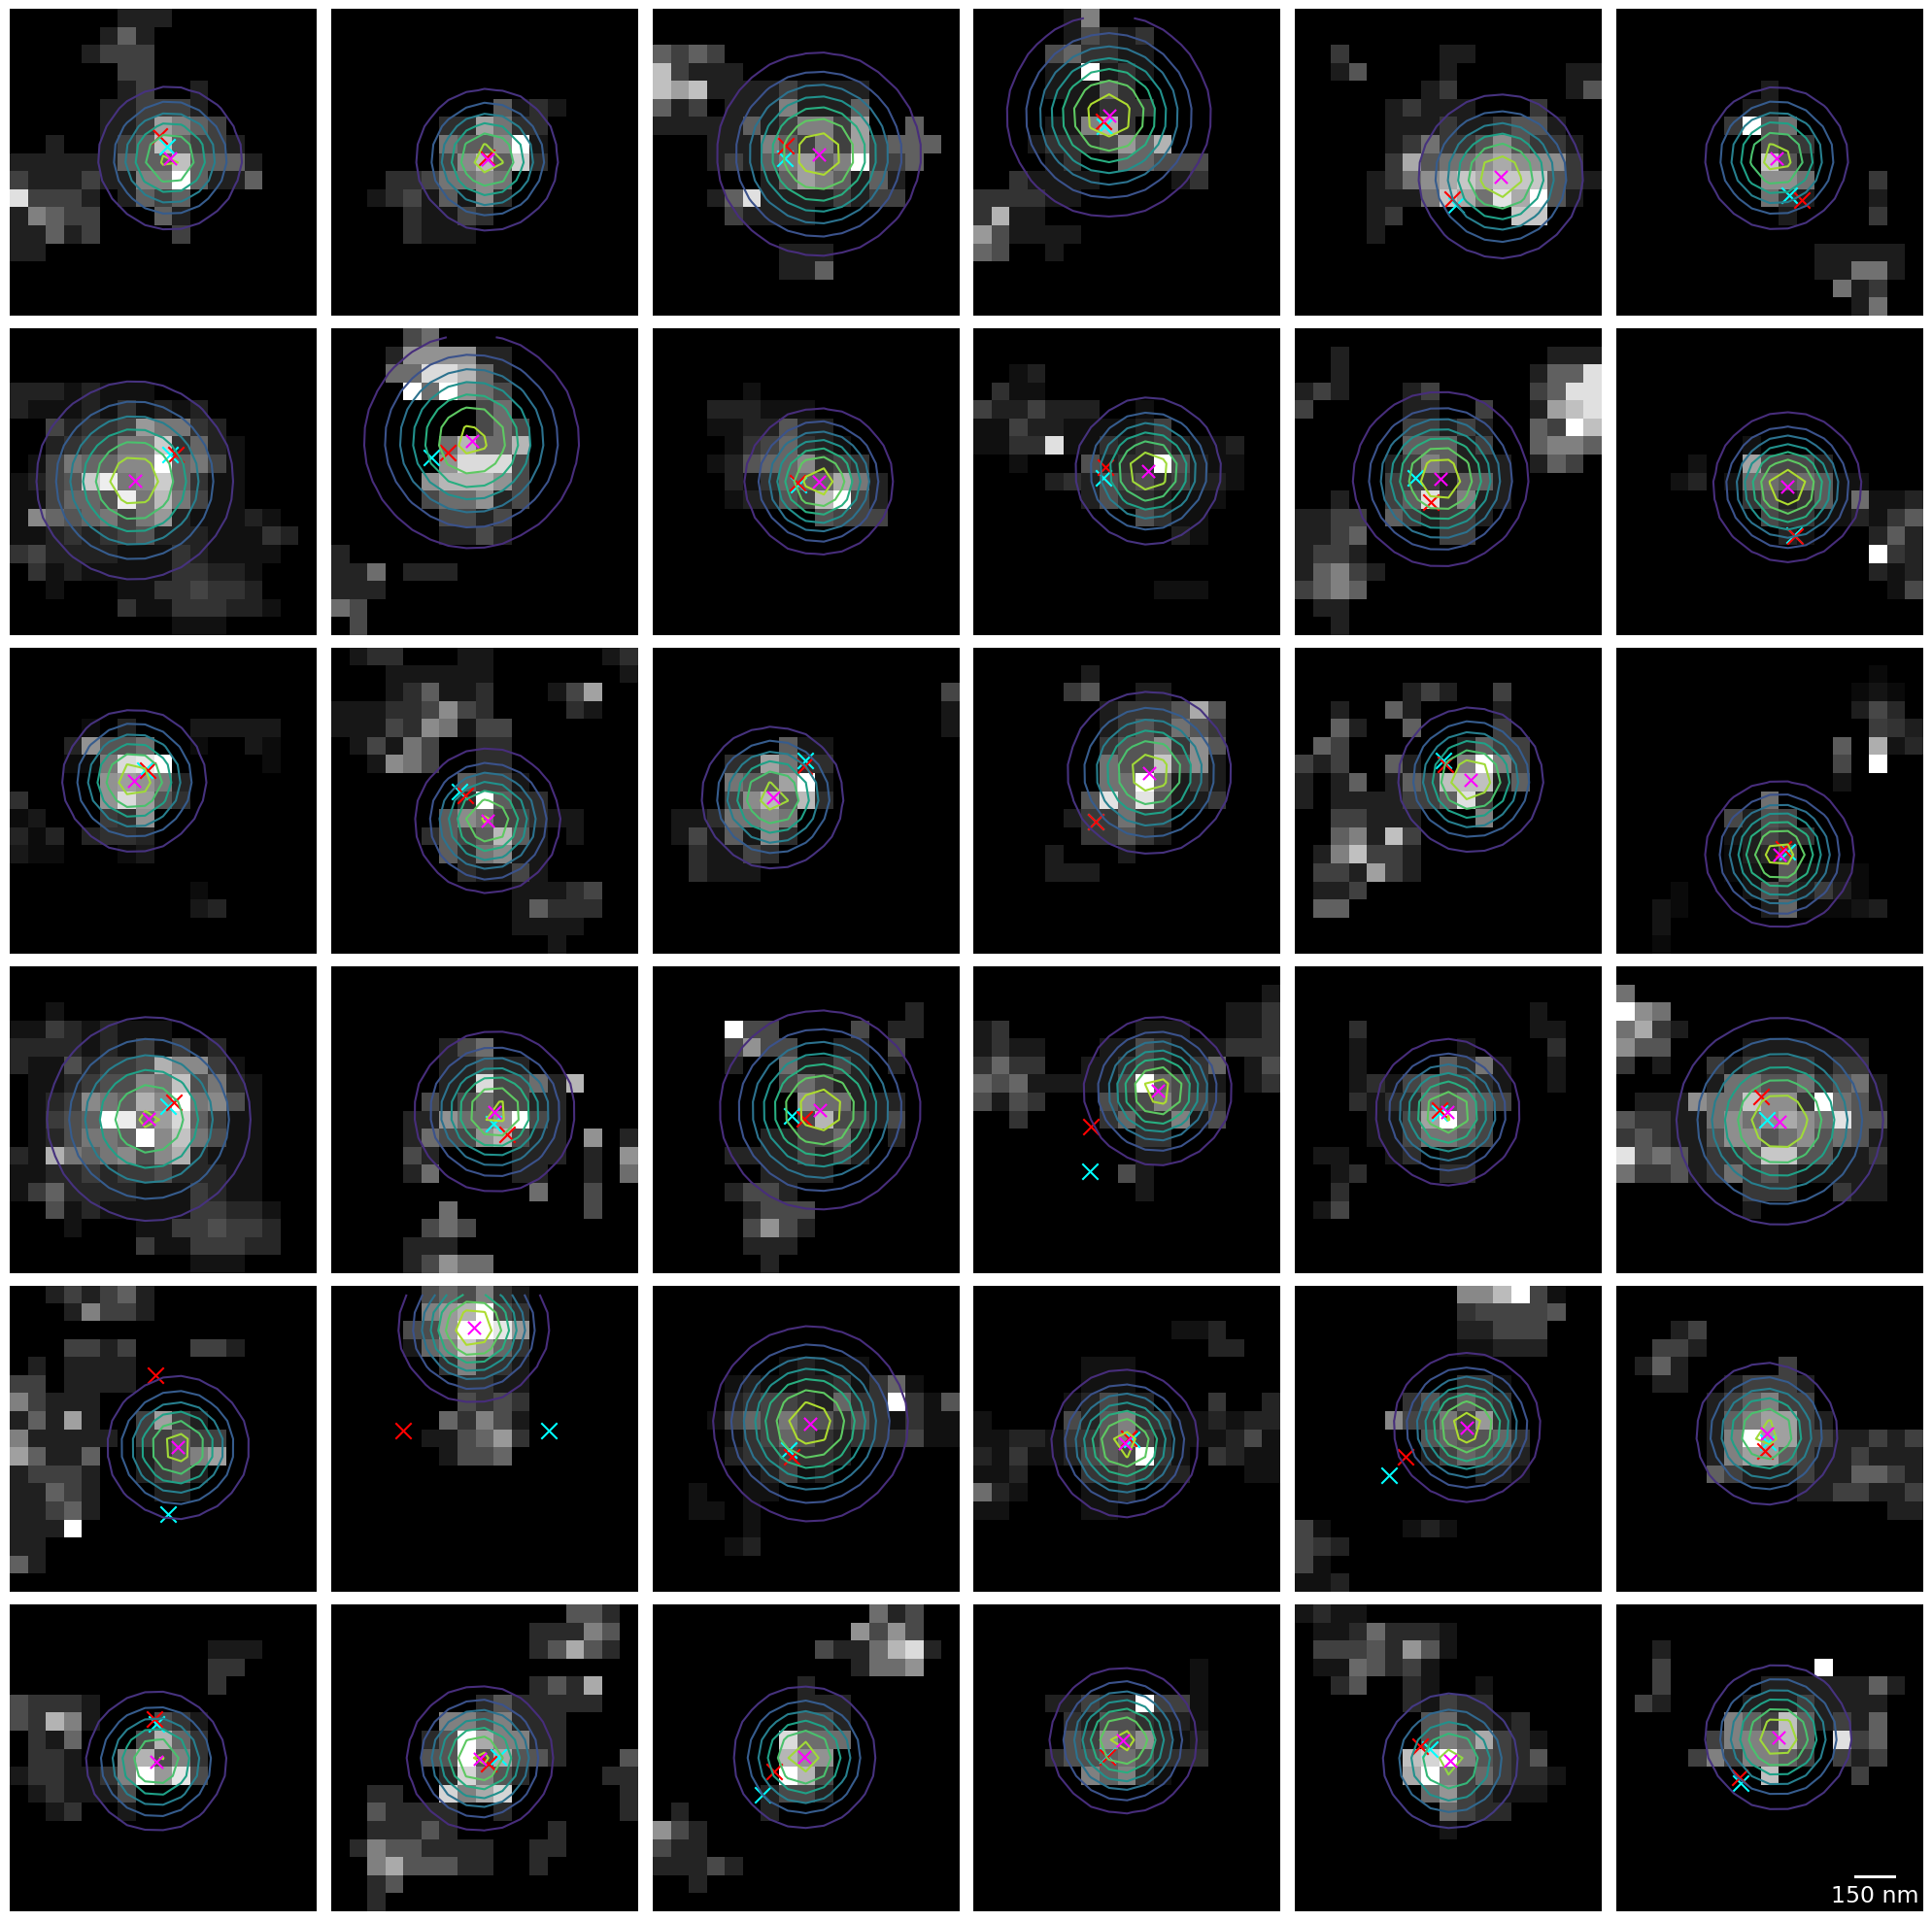

In [8]:
%cd /home/smlm-workstation/event-smlm/event-smlm-thesis/PeakLoc/
from localization_scripts.plotting_functions import plot_rois_from_locs

nice_rois = data[data['E_total']>150]
plot_rois_from_locs(nice_rois[1000:], filename, sign=1, dataset_FWHM=8.5)
# %cd /home/smlm-workstation/event-smlm/Paris/MT_CL/
%cd /home/smlm-workstation/event-smlm/our_ev_smlm_recordings/MT_CL_06_08/
plt.savefig(filename[:-4] + '_rois_examples.png', dpi=300, transparent=True, bbox_inches = 'tight')

## comparison

/home/smlm-workstation/miniconda3/envs/mvis/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/smlm-workstation/miniconda3/envs/mvis/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


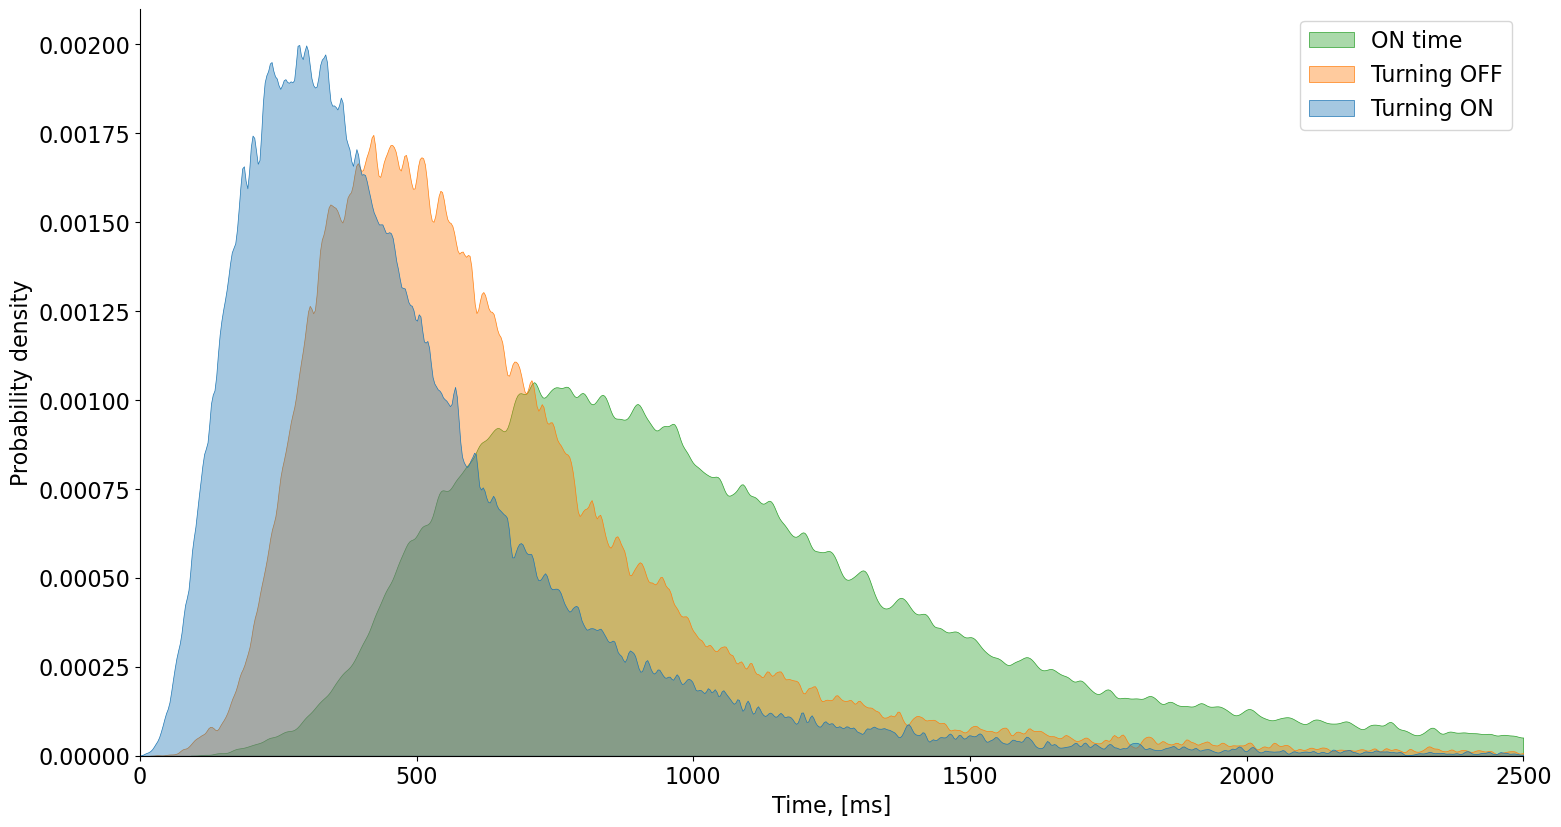

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_mean_and_subtract(data, t_peak, filter=False):
    on = data['roi_event_times']
    off = data['roi_event_times_n']
    if filter:
        on = on*(data['roi']>0)
        off = off*(data['roi_n']>0)
    mean_value_on = np.mean(on[on != 0])
    mean_value_off = np.mean(off[off != 0])
    # result = np.zeros(3, dtype=[('Turning ON', np.float64), ('Turning OFF', np.float64), ('ON time', np.float64)])
    result = np.zeros(3)
    result[0] = (t_peak - mean_value_on)/1e3
    result[1] = (mean_value_off - t_peak)/1e3
    result[2] = (mean_value_off - mean_value_on)/1e3
    # result[0] = (t_peak - mean_value_on)
    # result[1] = (mean_value_off - t_peak)
    # result[2] = (mean_value_off - mean_value_on)
    return result

# Example usage
input_data = data[['roi_event_times', 'roi_event_times_n', 'roi', 'roi_n']]

values_to_subtract = data['t_peak'] # Values to subtract

# results = np.zeros((input_data.shape[0],3), dtype=[('Turning ON', np.float64), ('Turning OFF', np.float64), ('ON time', np.float64)])  # Array to store the results
results = np.zeros((input_data.shape[0],3))  # Array to store the results

for i, (matrix, value) in enumerate(zip(input_data, values_to_subtract)):
    result = calculate_mean_and_subtract(matrix, value, filter=True)
    results[i] = result

import seaborn as sns

g = sns.displot(data=results, kind="kde", bw_adjust=.1, gridsize=800,common_norm=0, fill=True, clip=[0, 2500], linewidth=0.5, alpha=0.4, legend=0, height=8, aspect=15/8)
g.ax.set_xlabel('Time, [ms]', fontsize=16)
g.ax.set_ylabel('Probability density', fontsize=16)
g.ax.tick_params(axis='both', which='major', labelsize=16)
g.ax.set_xlim(0, 2500)
plt.legend(loc='upper right', labels=['ON time', 'Turning OFF', 'Turning ON'], fontsize=16)
# plt.savefig('/home/smlm-workstation/event-smlm/event-smlm-thesis/figures/fluorophore_time_statisctics_MT_CL_Paris_1.png', dpi=300, transparent=False, bbox_inches = 'tight')
# plt.ticklabel_format(style='scientific', axis='y')
plt.savefig(filename[:-4]
            + 'mean_tON_' + "{:.1f}".format(np.nanmean(results[:,0]))
            + '_mean_tOFF_' + "{:.1f}".format(np.nanmean(results[:,1]))
            + '_mean_ON_' + "{:.1f}".format(np.nanmean(results[:,2]))
            + '_std_tON_' + "{:.1f}".format(np.nanstd(results[:,0]))
            + '_std_tOFF_' + "{:.1f}".format(np.nanstd(results[:,1]))
            + '_std_ON_' + "{:.1f}".format(np.nanstd(results[:,2]))
            +  '.png', dpi=300, transparent=True, bbox_inches = 'tight')


In [240]:
import csv
with open("statistics.csv", mode="a") as new_file:
    writer = csv.writer(new_file, delimiter=",") # Writes to the new CSV file 
    # writer.writerow(['filename', 'mean tON time', 'mean tOFF time', 'mean ON time', 'std tON time', 'std tOFF time', 'std ON time'])
    writer.writerow((filename[:-4], "{:.1f}".format(np.nanmean(results[:,0])), "{:.1f}".format(np.nanmean(results[:,1])), "{:.1f}".format(np.nanmean(results[:,2])), "{:.1f}".format(np.nanstd(results[:,0])), "{:.1f}".format(np.nanstd(results[:,1])), "{:.1f}".format(np.nanstd(results[:,2]))))

In [10]:
def happend(x, col_data,col_name:str):
    if not x.dtype.fields:  return None                                     # Not a structured array
    y = np.empty(x.shape, dtype=x.dtype.descr+[(col_name,col_data.dtype)])  # 0) create new structured array
    for name in x.dtype.fields.keys():  y[name] = x[name]                   # 1) copy old array
    y[col_name] = col_data                                                  # 2) copy new column
    return y

data = happend(data, results[:,0],'t_on') 
data = happend(data, results[:,1],'t_off') 
data = happend(data, results[:,2],'ON_t') 

# generate image

In [16]:
# orig_data = data
data = orig_data 
# data = data[data['rms'] < 1.6]
# data = data[data['E_total'] > 50]
# data = data[data['double']==0]
# data = data[:5000]
pixel_recon_dim = 0.4
hist_2d, _ = neighbor_interpolation(data, pixel_recon_dim, take_negatives=1, take_positives=1, loc_source='gaussian', i_field='I', interpolate=True)
# hist_2d = histogram_binning(data, pixel_recon_dim, take_negatives=0, take_positives=1)
# hist_2d, _ = neighbor_interpolation(data, pixel_recon_dim, take_negatives=0, take_positives=1, loc_source='gaussian', i_field='I')
# hist_2d, num = neighbor_interpolation(data, pixel_recon_dim, take_negatives=1, take_positives=0, loc_source='phasor', i_field='t_on', interpolate=False)
# hist_2d, num = neighbor_interpolation(data, pixel_recon_dim, take_negatives=1, take_positives=1, loc_source='phasor', i_field='t_off', interpolate=False)
# hist_2d, num = neighbor_interpolation(data, pixel_recon_dim, take_negatives=1, take_positives=1, loc_source='phasor', i_field='ON_t', interpolate=False)
# hist_2d1 = neighbor_interpolation(data, pixel_recon_dim, take_negatives=1, take_positives=1, loc_source='phasor', i_field='t_off')
# hist_2d2 = neighbor_interpolation(data, pixel_recon_dim, take_negatives=1, take_positives=1, loc_source='phasor', i_field='ON_t')
# hist_2d = neighbor_interpolation(data, pixel_recon_dim, take_negatives=1, take_positives=1, loc_source='gaussian')

# drift_corrected = drift_correction(crop, data, 4, pixel_dim=pixel_recon_dim, mode='crop', pixel_dim_out=0.08)
# drift_corrected = drift_correction(data, num_images=8, pixel_dim=pixel_recon_dim, mode='same')
# hist_2d = neighbor_interpolation(drift_corrected, pixel_recon_dim, take_negatives=1, take_positives=1)

# drift_corrected = drift_correction(drift_corrected, 5, pixel_recon_dim)
# pixel_recon_dim = 0.1

# hist_2d = hist_2d1 - hist_2d0


# hist_2d = hist_2d[2200:2300, 1600:1700]
# hist_2d = hist_2d[:3000, :3000]

hist_2d.shape

(3146, 1809)

In [17]:
pixel_recon_dim = 0.4
hist_2d1, num = neighbor_interpolation(data, pixel_recon_dim, take_negatives=1, take_positives=1, loc_source='gaussian', i_field='ON_t', interpolate=False)
hist_2d1 = np.where(np.isfinite(hist_2d1), hist_2d1, 0)
for x in range(0, hist_2d1.shape[0]):
    for y in range(0, hist_2d1.shape[1]):
        if num[x,y] != 0:
            hist_2d1[x,y] = hist_2d1[x,y]/num[x,y]
        if hist_2d1[x,y] < 0 or hist_2d1[x,y] == np.nan:
            hist_2d1[x,y] = 0
np.mean(hist_2d1)
        

16.501810797606684

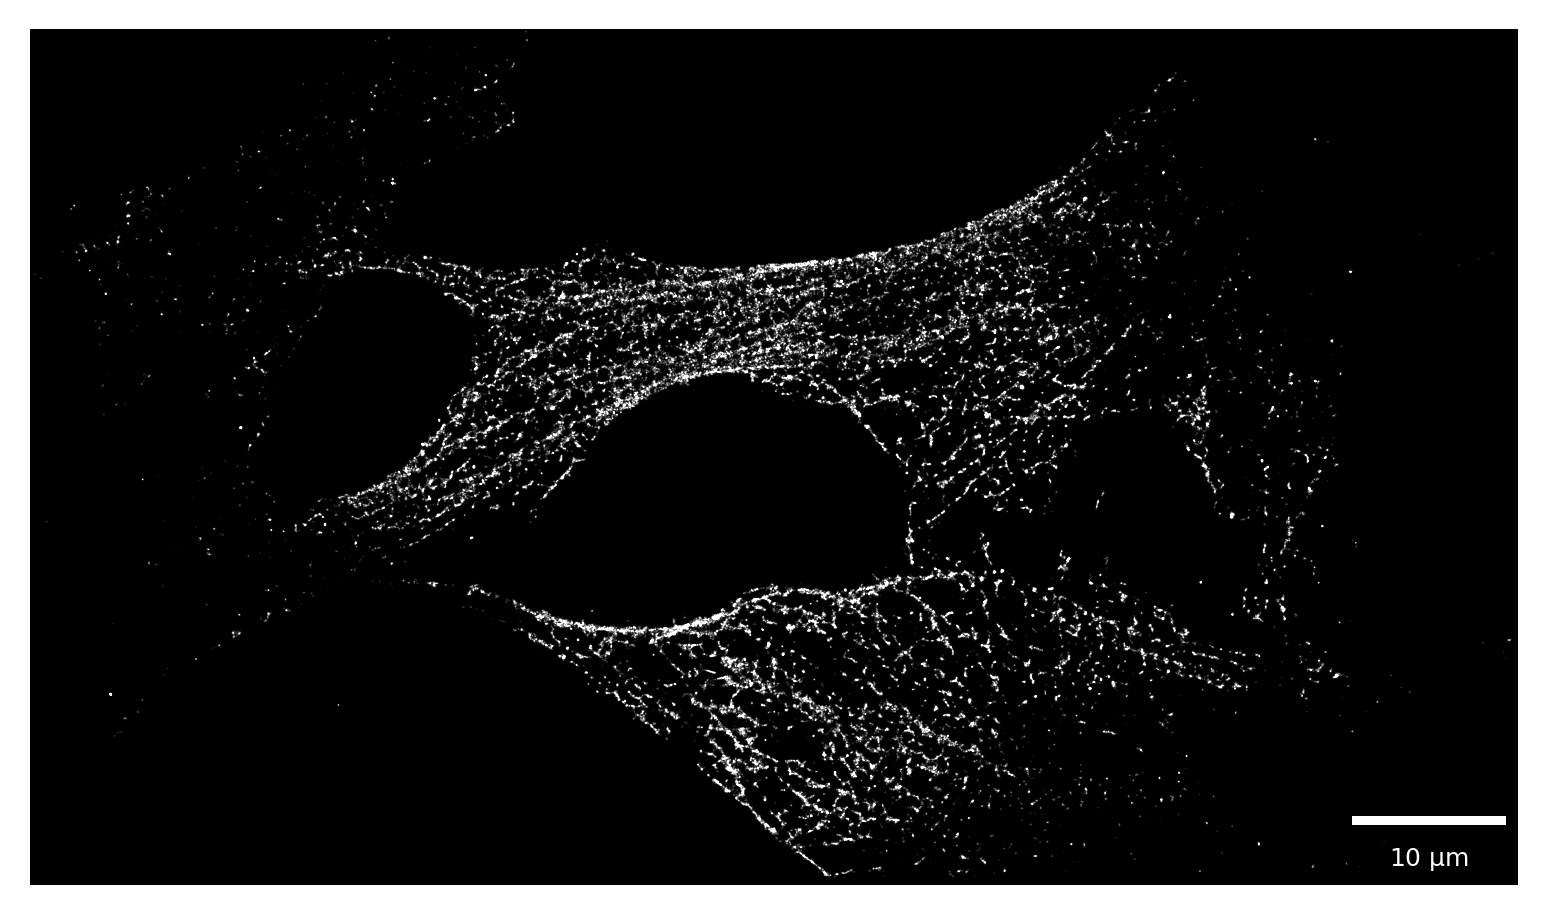

In [18]:
import matplotlib.pyplot as plt
import tifffile, os
plt.rcParams['figure.dpi'] = 300
# hist_2d = hist_2d.T
from matplotlib_scalebar.scalebar import ScaleBar
# plt.rcParams['axes.titlesize'] = 6
# plt.title("'ON' time as pixel intensity", fontsize=8)
# plt.title("0.3 negatives" )
# plt.title("0.3 only negatives discard far" )
# plt.title("0.3 only positives")

# im = plt.imshow(hist_2d.T, vmax=np.mean(np.nonzero(hist_2d)) * 0.00111, cmap='hot', interpolation='gaussian')
# im = plt.imshow(hist_2d.T, vmax=hist_2d.mean()/1e-2, cmap='hot', interpolation='none')
# im = plt.imshow(hist_2d.T[400:-400,500:3000], vmax=hist_2d.mean()/0.03, cmap='hot', interpolation='gaussian')
# im = plt.imshow(hist_2d.T[700:-500, :], vmax=hist_2d.mean()/0.06, cmap='hot', interpolation='gaussian')
im = plt.imshow(hist_2d.T, vmax=3, cmap='gray', interpolation='gaussian')
# im = plt.imshow(hist_2d.T[-670:-8, :], vmax=4, cmap='gray', interpolation='gaussian')
# im = plt.imshow(hist_2d.T[0:670, :], vmax=4, cmap='gray', interpolation='gaussian')
# im = plt.imshow(hist_2d,vmin=0, vmax=hist_2d.max()/20, cmap='gnuplot', interpolation='none')
# im = plt.imshow(hist_2d,vmin=0, vmax=hist_2d.max()/20, cmap='gnuplot', interpolation='gaussian')
# im = plt.imshow(hist_2d1.T, vmax=hist_2d1.max()/1e3, cmap='viridis', interpolation='none')
# im = plt.imshow(hist_2d2.T, vmax=hist_2d2.max()/1e3, cmap='viridis', interpolation='none')
# im = plt.imshow(hist_2d.T, vmax=hist_2d.max()/0.01, cmap='viridis', interpolation='none')
# cbar = plt.colorbar(im, fraction=0.0122, pad=0.015, aspect = 49)
# cbar.set_ticks([])
# cbar.ax.get_yaxis().labelpad = 8
# cbar.ax.set_ylabel('molecule density, a.u.', rotation=270)
plt.axis('off') 
# plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] + '_supres_nocbar.png', dpi=300, transparent=True, bbox_inches = 'tight')
plt.savefig(filename[:-4] + '_supres_nocbar.png', dpi=300, transparent=True, bbox_inches = 'tight')
# hist_2d = np.where(hist_2d<hist_2d.max()/30, hist_2d, 0)
# tifffile.imwrite('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] + '_supres_nocbar.tiff', hist_2d[0:600, :].astype(np.int8))
# cbar = plt.colorbar(im, fraction=0.0087, pad=-0.0001, aspect=88.5)
# cbar = plt.colorbar(im, fraction=0.0087, pad=-0.0001, aspect=59.6)
# cbar.set_ticks([])
# cbar.ax.set_ylabel('molecule density, a.u.', rotation=270, fontsize=9, labelpad=11)
# cbar.outline.set_visible(False)
scalebar = ScaleBar(pixel_recon_dim*77, units='nm', length_fraction=0.15, location='lower right',pad=None, frameon=False,box_color='w', color='white', box_alpha=0, font_properties={'size': 6})
plt.gca().add_artist(scalebar)


crop = 0
if crop == 1:
    plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] + '_crop_supres.png', dpi=300, transparent=True, bbox_inches = 'tight')
    plt.savefig(filename[:-4] + '_crop_supres.png', dpi=300, transparent=True, bbox_inches = 'tight')
else:
    plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] + '_supres.png', dpi=300, transparent=True, bbox_inches = 'tight')
    plt.savefig(filename[:-4] + '_supres.png', dpi=300, transparent=True, bbox_inches = 'tight')
# plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] +'_mean_ON time as pixel intensity.png', dpi=300, transparent=True, bbox_inches = 'tight')
# plt.savefig(filename[:-4] +'_mean_ON time as pixel intensity.png', dpi=300, transparent=True, bbox_inches = 'tight')

In [120]:
from scipy.ndimage import gaussian_filter
hist_2d2 = gaussian_filter(hist_2d1, sigma=0.8, radius=2)

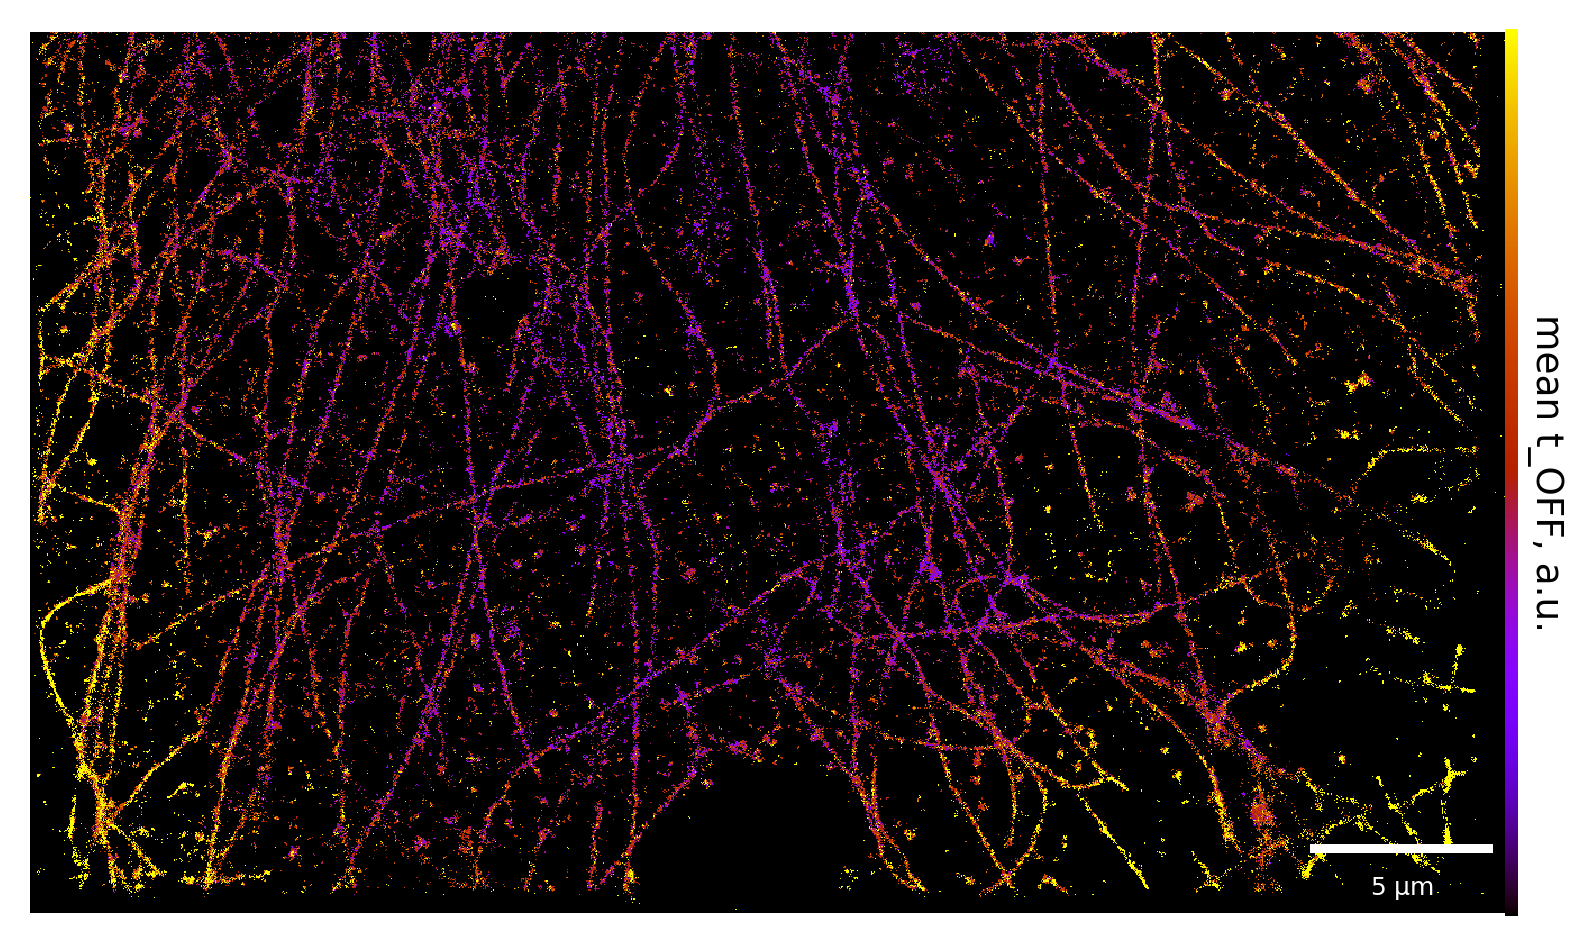

In [159]:
import matplotlib.pyplot as plt
import tifffile, os
plt.rcParams['figure.dpi'] = 300
# hist_2d = hist_2d.T
from matplotlib_scalebar.scalebar import ScaleBar

scalebar = ScaleBar(pixel_recon_dim*77, units='nm', length_fraction=0.15, location='lower right',pad=None, frameon=False,box_color='w', color='white', box_alpha=0, font_properties={'size': 6})

plt.gca().add_artist(scalebar)
# im = plt.imshow(hist_2d.T, vmax=np.mean(np.nonzero(hist_2d)) * 0.00111, cmap='hot', interpolation='gaussian')
# im = plt.imshow(hist_2d.T, vmax=hist_2d.mean()/1e-2, cmap='hot', interpolation='none')
# im = plt.imshow(hist_2d, vmax=hist_2d.mean()/0.09, cmap='hot', interpolation='gaussian')
# im = plt.imshow(hist_2d1.T[200:-200,200:1500],vmin=0, vmax=hist_2d1.max()/11, cmap='gnuplot', interpolation='none')
# im = plt.imshow(hist_2d1.T[250:-150,:],vmin=0, vmax=hist_2d1.max()/3.5, cmap='gnuplot', interpolation='nearest')
im = plt.imshow(hist_2d1[600:-1, :],vmin=0, vmax=390, cmap='gnuplot', interpolation='nearest')
# im = plt.imshow(hist_2d1.T[-670:-8,:],vmin=0, vmax=950, cmap='gnuplot', interpolation='nearest')
# im = plt.imshow(hist_2d1.T[0:670,:],vmin=0, vmax=750, cmap='gnuplot', interpolation='nearest')
# im = plt.imshow(hist_2d1.T,vmin=0, vmax=hist_2d1.max()/7, cmap='gnuplot', interpolation='gaussian')
# cbar = plt.colorbar(im, fraction=0.0122, pad=0.015, aspect = 49)
# cbar.set_ticks([])
# cbar.ax.get_yaxis().labelpad = 8
# cbar.ax.set_ylabel('molecule density, a.u.', rotation=270)

cbar = plt.colorbar(im, fraction=0.0087, pad=-0.0001, aspect=68.5)
# cbar = plt.colorbar(im, fraction=0.0087, pad=-0.0001, aspect=48.6)
cbar.set_ticks([])
cbar.ax.set_ylabel('mean t_OFF, a.u.', rotation=270, fontsize=9, labelpad=11)
cbar.outline.set_visible(False)
# im = plt.imshow(hist_2d.T, vmax=np.mean(np.nonzero(hist_2d)) * 0.007, cmap='hot', interpolation='none')
plt.axis('off') 

# plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] + '_supres.png', dpi=300, transparent=True, bbox_inches = 'tight')
# plt.savefig(filename[:-4] + '_supres.png', dpi=300, transparent=True, bbox_inches = 'tight')

crop = 1

# plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] +'_crop_mean_t_ON  as pixel intensity.png', dpi=300, transparent=True, bbox_inches = 'tight')
# plt.savefig(filename[:-4] +'_crop_mean_t_ON as pixel intensity.png', dpi=300, transparent=True, bbox_inches = 'tight')
plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] +'_crop_mean_t_OFF  as pixel intensity.png', dpi=300, transparent=True, bbox_inches = 'tight')
plt.savefig(filename[:-4] +'_crop_mean_t_OFF as pixel intensity.png', dpi=300, transparent=True, bbox_inches = 'tight')

# if crop == 1:
#     plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] +'_crop_mean_ON time as pixel intensity.png', dpi=300, transparent=True, bbox_inches = 'tight')
#     plt.savefig(filename[:-4] +'_crop_mean_ON time as pixel intensity.png', dpi=300, transparent=True, bbox_inches = 'tight')
# else:
#     plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] +'_mean_ON time as pixel intensity.png', dpi=300, transparent=True, bbox_inches = 'tight')
#     plt.savefig(filename[:-4] +'_mean_ON time as pixel intensity.png', dpi=300, transparent=True, bbox_inches = 'tight')


In [ ]:
# masked = hist_2d[hist_2d1>hist_2d1.mean()]
from scipy.ndimage import gaussian_filter
from skimage import morphology
masked = np.where((hist_2d1>1)&(hist_2d1<530),hist_2d,0)
masked += np.where((hist_2d1>4200), hist_2d, 0)
# masked = np.where(morphology.remove_small_objects(gaussian_filter(masked, sigma=0.5, radius=1)>0, 15, connectivity=1), masked, 0)
# im = plt.imshow(masked.T, vmax=masked.mean()/0.04, cmap='hot', interpolation='gaussian')
masked1 = gaussian_filter(masked, sigma=0.5, radius=2)
# im = plt.imshow(masked1.T[-670:-8,:], vmax=1, cmap='gray', interpolation='gaussian')
# im = plt.imshow(masked1.T[0:670,:], vmax=1, cmap='gray', interpolation='gaussian')
im = plt.imshow(masked.T, vmax=1, cmap='gray', interpolation='none')
# im = plt.imshow(masked, vmax=masked.mean()/0.03, cmap='hot', interpolation='gaussian')
plt.axis('off') 
crop = 1
# cbar = plt.colorbar(im, fraction=0.0087, pad=-0.0001, aspect=59.6)
# cbar.set_ticks([])
# cbar.ax.set_ylabel('molecule density, a.u.', rotation=270, fontsize=9, labelpad=11)
# cbar.outline.set_visible(False)
if crop == 1:
    plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] +'_CL_Masked_crop.png', dpi=300, transparent=True, bbox_inches = 'tight')
    plt.savefig(filename[:-4] +'_CL_Masked_crop.png', dpi=300, transparent=True, bbox_inches = 'tight')
    # plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] +'_CL_bound_Masked_crop.png', dpi=300, transparent=True, bbox_inches = 'tight')
    # plt.savefig(filename[:-4] +'_CL_bound_Masked_crop.png', dpi=300, transparent=True, bbox_inches = 'tight')
# else:
#     plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] +'_CL_Masked.png', dpi=300, transparent=True, bbox_inches = 'tight')
#     plt.savefig(filename[:-4] +'_CL_Masked.png', dpi=300, transparent=True, bbox_inches = 'tight')


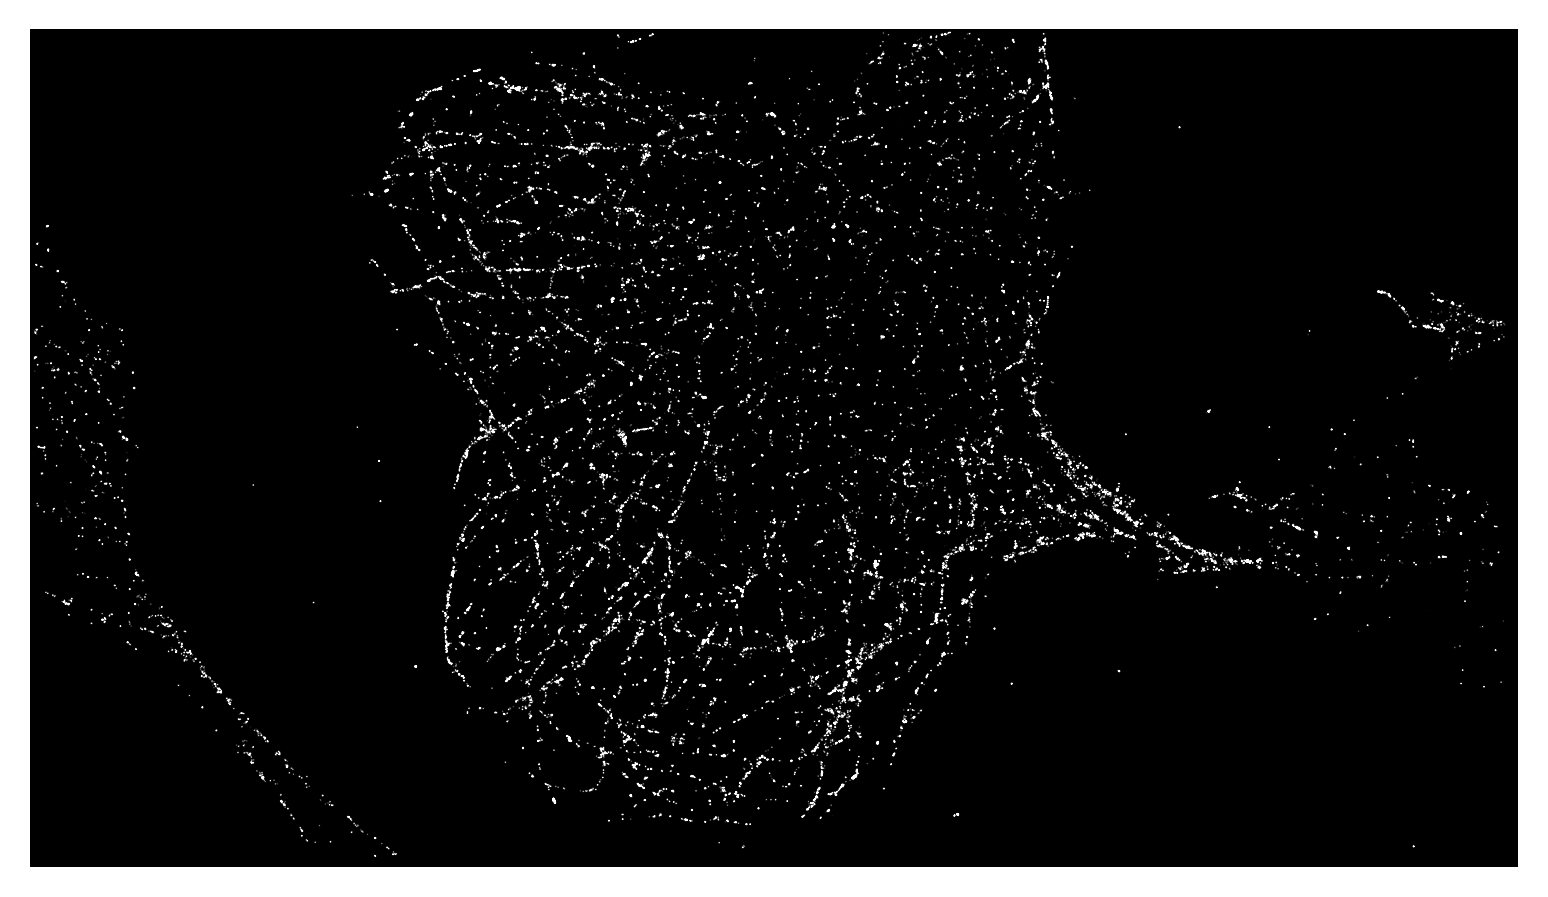

In [49]:
# masked = hist_2d[hist_2d1>hist_2d1.mean()]
from skimage import morphology
masked = np.where((hist_2d1>410)&(hist_2d1<700), hist_2d, 0)
# masked = np.where(morphology.remove_small_objects(gaussian_filter(masked, sigma=0.6, radius=1)>0, 30, connectivity=1), masked, 0)
# masked = np.where(morphology.remove_small_objects(gaussian_filter(masked, sigma=0.6, radius=2)>0, 200, connectivity=1), masked, 0)
# masked = np.where(masked<masked.max()/50, masked, masked.mean())
# masked = gaussian_filter(masked, sigma=0.3, radius=1)
# masked = np.where(masked1==0, masked, masked/20)

# im = plt.imshow(masked.T, vmax=masked.mean()/0.05, cmap='hot', interpolation='gaussian')
# im = plt.imshow(masked.T[-670:-8,:], vmax=1, cmap='gray', interpolation='gaussian')
# im = plt.imshow(masked.T[0:670,:], vmax=1, cmap='gray', interpolation='gaussian')
im = plt.imshow(masked.T, vmax=1, cmap='gray', interpolation='gaussian')
# im = plt.imshow(masked[0:600,:], vmax=masked.mean()/0.03, cmap='hot', interpolation='gaussian')
plt.axis('off') 

crop = 1
if crop == 1:
    plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] +'_MT_Masked_crop.png', dpi=300, transparent=True, bbox_inches = 'tight')
    plt.savefig(filename[:-4] +'_MT_Masked_crop.png', dpi=300, transparent=True, bbox_inches = 'tight')
# else:
#     plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] +'_MT_Masked.png', dpi=300, transparent=True, bbox_inches = 'tight')
#     plt.savefig(filename[:-4] +'_MT_Masked.png', dpi=300, transparent=True, bbox_inches = 'tight')

In [19]:
seg = np.load('/home/smlm-workstation/event-smlm/Paris/MT/recording_2023-05-24T09-12-08.025Z/localizations_prominence_fwhm_8_prominence_10_supres_nocbar_Andrey.npy')
# plt.imshow(seg[:,:,0], cmap='hot', interpolation='gaussian')

In [20]:
orig = hist_2d[0:600, :]
orig.shape

(600, 1151)

In [46]:
map_cl = seg[:,:,1]
map_cl.shape

(160, 320)

In [49]:

import scipy
# map_cl.shape
resized = scipy.ndimage.zoom(map_cl, zoom = 3.75)
resized = gaussian_filter(resized, sigma=0.5, radius=1)


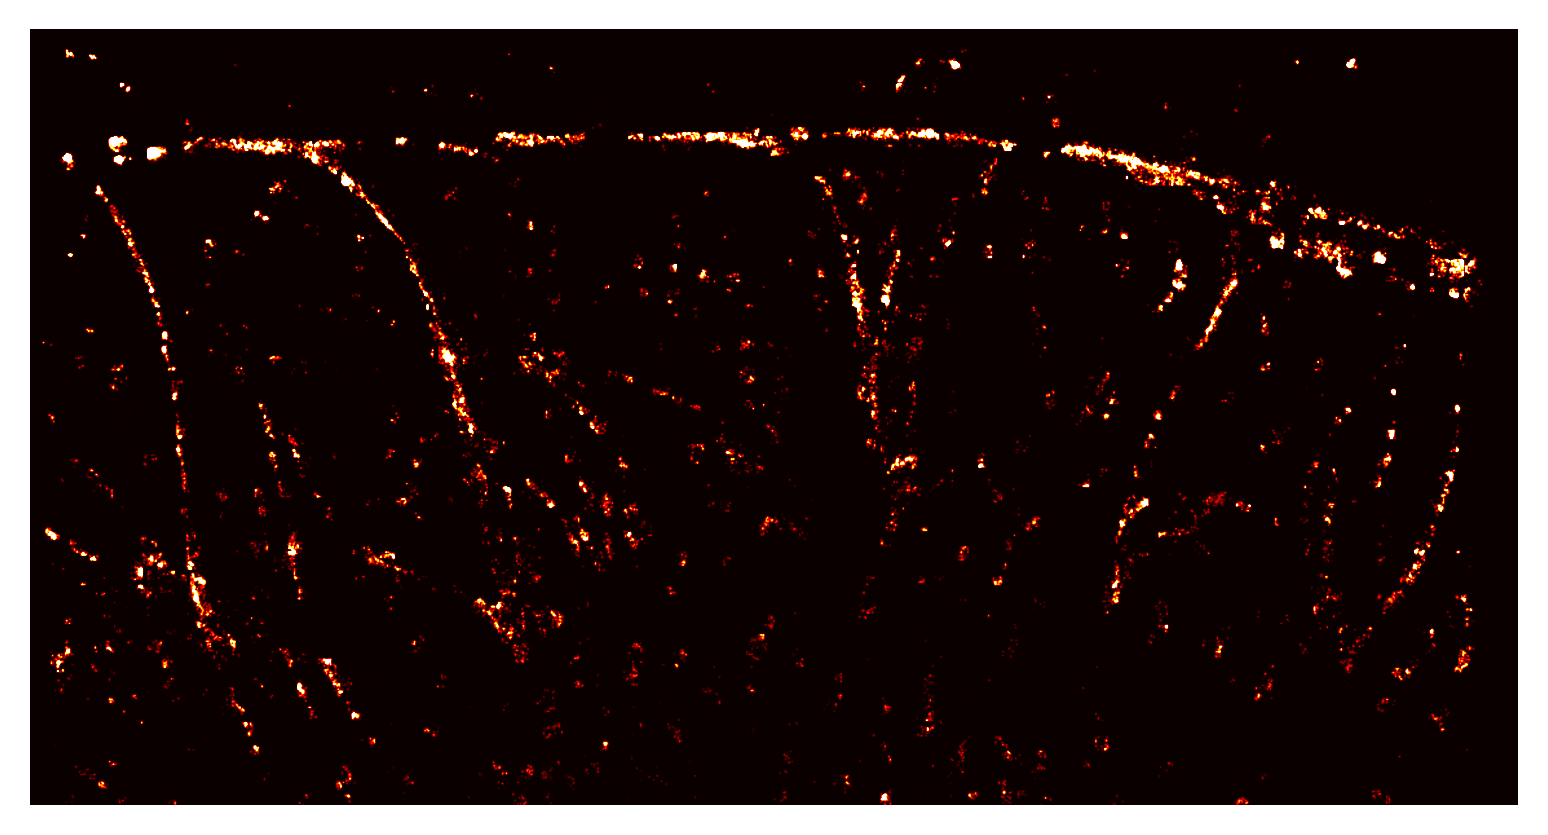

In [52]:
cl = np.where(resized[:,:1151]>0, orig, 0)
plt.axis('off') 
plt.imshow(cl,vmax=5, cmap='hot', interpolation='gaussian')
# plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] +'_CL_unet_Masked_crop.png', dpi=300, transparent=True, bbox_inches = 'tight')
# plt.savefig(filename[:-4] +'_CL_unet_Masked_crop.png', dpi=300, transparent=True, bbox_inches = 'tight')
plt.savefig('/home/smlm-workstation/event-smlm/generated_data/superres_images/' + os.path.basename(filename)[:-4] +'_MT_unet_Masked_crop.png', dpi=300, transparent=True, bbox_inches = 'tight')
plt.savefig(filename[:-4] +'_MT_unet_Masked_crop.png', dpi=300, transparent=True, bbox_inches = 'tight')

In [ ]:
from localization_scripts.plotting_functions import plot_3d_time

plot_time = data[(data['E_total'] > 100) * (data['double'] ==0)]
id = 1004
start_times = plot_time[id]['roi_event_times']*(plot_time[id]['roi'] > 0)
end_times = plot_time[id]['roi_event_times_n']*(plot_time[id]['roi'] > 0)

plot_3d_time(start_times, end_times)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim

def plot_ssim_difference(image1, image2):
    # Compute the minimum and maximum values between the two images
    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    data_min = min(np.min(image1), np.min(image2))
    data_max = max(np.max(image1), np.max(image2))

    # Compute the structural similarity index (SSIM) between the two images
    ssim_index, ssim_difference = ssim(image1, image2, full=True, data_range=data_max/2)
    print(f'SSIM index: {ssim_index}')
    # Normalize the difference image to the range [0, 1]
    ssim_difference = (ssim_difference - data_min) / (data_max - data_min)

    # Plot the difference image with enhanced visibility
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    ax1, ax2 = axes.ravel()

    ax1.imshow(image1, cmap='gray', vmin=data_min, vmax=data_max/1e6)
    ax1.set_title('Image 1')

    im = ax2.imshow(-ssim_difference, cmap='coolwarm', vmin=0, vmax=1)
    ax2.set_title('SSIM Difference')

    # Add colorbar for the difference image
    cbar = fig.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
    cbar.set_label('Difference')

    plt.tight_layout()
    plt.show()

plot_ssim_difference(hist_2d0, hist_2d1)


# FRC

In [ ]:
# random split of data for FRC
import tifffile
# data_shuffle = data
data_shuffle = data
np.random.shuffle(data_shuffle)
data1, data2 = data_shuffle[len(data_shuffle)//2:], data_shuffle[:len(data_shuffle)//2]
pixel_recon_dim = 0.3

# image1, _, _ = np.histogram2d(data1['x'], data1['y'], bins=[int(max_x/pixel_recon_dim), int(max_y/pixel_recon_dim)])
# image2, _, _ = np.histogram2d(data2['x'], data2['y'], bins=[int(max_x/pixel_recon_dim), int(max_y/pixel_recon_dim)])
# image1, _, _ = np.histogram2d(data1['x_com'], data1['y_com'], bins=[int((max_x-min_x)/pixel_recon_dim), int((max_y-min_y)/pixel_recon_dim)])
# image2, _, _ = np.histogram2d(data2['x_com'], data2['y_com'], bins=[int((max_x-min_x)/pixel_recon_dim), int((max_y-min_y)/pixel_recon_dim)])
# image1, _, _ = np.histogram2d(data1[1], data1[2], bins=[int((max_x-min_x)/pixel_recon_dim), int((max_y-min_y)/pixel_recon_dim)])
# image2, _, _ = np.histogram2d(data2[1], data2[2], bins=[int((max_x-min_x)/pixel_recon_dim), int((max_y-min_y)/pixel_recon_dim)])

# ...and bin values are normalized
# image1 /= np.sum(image1)
# image2 /= np.sum(image2)


# image1 = neighbor_interpolation(data1, pixel_recon_dim, take_negatives=1, take_positives=1, fixed_size=[400,250])
# image2 = neighbor_interpolation(data2, pixel_recon_dim, take_negatives=1, take_positives=1, fixed_size=[400,250])
# image1 = neighbor_interpolation(data1, pixel_recon_dim, take_negatives=1, take_positives=1, fixed_size=[125,125])
# image2 = neighbor_interpolation(data2, pixel_recon_dim, take_negatives=1, take_positives=1, fixed_size=[125,125])
image1 = neighbor_interpolation(data1, pixel_recon_dim, take_negatives=1, take_positives=1)
image2 = neighbor_interpolation(data2, pixel_recon_dim, take_negatives=1, take_positives=1)
# image1 = histogram_binning(data1, 400, 250, pixel_recon_dim, take_negatives=1, take_positives=1)
# image2 = histogram_binning(data2, 400, 250, pixel_recon_dim, take_negatives=1, take_positives=1)
# image1 = histogram_binning(data1, 120, 120, pixel_recon_dim, take_negatives=1, take_positives=1)
# image2 = histogram_binning(data2, 120, 120, pixel_recon_dim, take_negatives=1, take_positives=1)
# image1 = histogram_binning(data1, 80, 80, pixel_recon_dim, take_negatives=1, take_positives=1)
# image2 = histogram_binning(data2, 80, 80, pixel_recon_dim, take_negatives=1, take_positives=1)
# image1 = histogram_binning(data1, 170, 170, pixel_recon_dim, take_negatives=0, take_positives=1)
# image2 = histogram_binning(data2, 170, 170, pixel_recon_dim, take_negatives=0, take_positives=1)
image1 /= np.sum(image1)
image2 /= np.sum(image2)

image1=image1[1120:1590, 765:1290]
image2=image2[1120:1590, 765:1290]

# frc_stack = np.stack((image1.T, image2.T))

# plt.figure(figsize=(25, 25))
plt.rcParams['figure.dpi'] = 300
# im = plt.imshow(image1.T, vmax=np.mean(np.nonzero(image1)) * 0.12, cmap='hot', interpolation='gaussian')
# im = plt.imshow(image1.T, vmax=0.00002, cmap='hot', interpolation='gaussian')
plt.axis('off')
# plt.imshow(image1.T, vmax=15,
#            cmap='gray', interpolation='none')

tifffile.imwrite('/home/smlm-workstation/event-smlm/event-smlm-localization/figures/FRC1.tif', image1.T.astype('float16'))
tifffile.imwrite('/home/smlm-workstation/event-smlm/event-smlm-localization/figures/FRC2.tif', image2.T.astype('float16'))
# plt.savefig('/home/smlm-workstation/event-smlm/event-smlm-localization/figures/FRC_1.png', bbox_inches = 'tight', pad_inches = 0)
image1.max()

In [243]:
image1.shape

(2125, 2125)

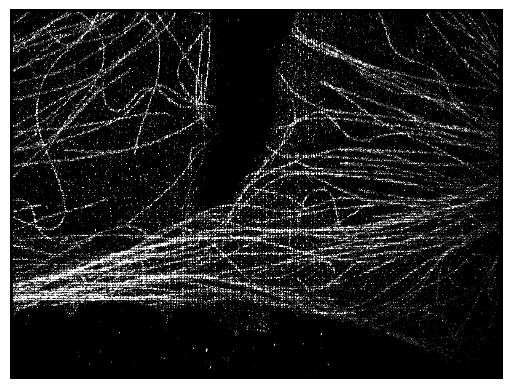

In [184]:
# plt.figure(figsize=(25, 25))
plt.axis('off')
plt.imshow(image2.T, vmax=45,
           cmap='gray', interpolation='none')
plt.savefig('/home/smlm-workstation/event-smlm/event-smlm-localization/figures/FRC_2.png', bbox_inches = 'tight', pad_inches = 0)

In [32]:
data = np.load('/home/smlm-workstation/event-smlm/generated_data/localizations/npy/tubulin300x400[7, 1800]_localizations_full.npy')

# We determine the pixel size for the image generation. Here we set it up to 10 nm.
pixel_recon_dim = 5

# We determine the maximum X and Y coordinates to generate proper histograms.
min_x = 0
min_y = 0
# max_x = np.ceil(np.max(data[:,1]))
# max_y = np.ceil(np.max(data[:,2]))
max_x = 400
max_y = 300

data = data[~np.isnan(data['y'])]
data = data[~np.isnan(data['x'])]
data = data[data['E_total'] > 70]
# data = data[:500000]
# data = data[-100000:]
# data = data[data['id'] < 20000]
data = data[data['id'] > 700000]
data.shape

# for loc in data:
#     loc['x'] += 2.96*0.08
#     loc['y'] -= 25.02*0.08

(1185653,)

In [104]:
# We prepare the method which will compute the amount of intensity which will 
# be received by the pixel based on the subpixel localization of the processed event
def interpolation_value(x, pixel_dim=10):
    y = (-np.abs(x)/pixel_dim + 1)
    return y

In [139]:
pixel_recon_dim = 0.1
hist_2d = np.zeros((int(max_x/pixel_recon_dim)+3, int(max_y/pixel_recon_dim)+3))
hist_2d.shape
for d in data2:
# Based on X and Y coordinates we determine the pixel position by dividing the 
# coordinates with the floor division (//) operation...
    coord_x = int(d['x'].astype(np.float32) / pixel_recon_dim) + 1
    coord_y = int(d['y'].astype(np.float32) / pixel_recon_dim) + 1
    # ... and also we determine the subpixel pisition of the event. We subtract 
    # the halved pixel dimension value from X and Y subpixel position in order 
    # to determine how the event is oriented with respect to the pixel center. 
    # This value will be used  for the intensity distribution and finding 
    # neighboring pixels which will receive a fraction of this intensity as well
    position_x = d['x'] % pixel_recon_dim - pixel_recon_dim/2
    position_y = d['y'] % pixel_recon_dim - pixel_recon_dim/2

    # we calculate the 'pixel-intensity' which is used for the linear interpolation
    x_int = interpolation_value(position_x, pixel_recon_dim)
    y_int = interpolation_value(position_y, pixel_recon_dim)

    # Finally we distribute even itnensities to pixels. 
    # The original pixel is at coord_x and coord_y values
    hist_2d[coord_x, coord_y] += x_int*y_int * d['I']

    # The horizontal neighbor pixel is on the right (or left) side of the 
    # original pixel, assuming the datapoint is on the right (or left) 
    # half of the original pixel.
    if position_x > 0:
        hist_2d[coord_x+1, coord_y] += (1-x_int)*y_int * d['I']
    else:
        hist_2d[coord_x-1, coord_y] += (1-x_int)*y_int * d['I']

    # Similarly we find a vertical neighbor in up & down dimension.
    if position_y > 0:
        hist_2d[coord_x, coord_y+1] += x_int*(1-y_int) * d['I']
    else:
        hist_2d[coord_x, coord_y-1] += x_int*(1-y_int) * d['I']

    # Finally we find the diagonal neighbors by combining the code used in the 
    # horizontal and vertical neighbours
    if position_x > 0:
        if position_y > 0:
            hist_2d[coord_x+1, coord_y+1] += (1-x_int)*(1-y_int) * d['I']
        else:
            hist_2d[coord_x+1, coord_y-1] += (1-x_int)*(1-y_int) * d['I']
    else:
        if position_y > 0:
            hist_2d[coord_x-1, coord_y+1] += (1-x_int)*(1-y_int) * d['I']
        else:
            hist_2d[coord_x-1, coord_y-1] += (1-x_int)*(1-y_int) * d['I']

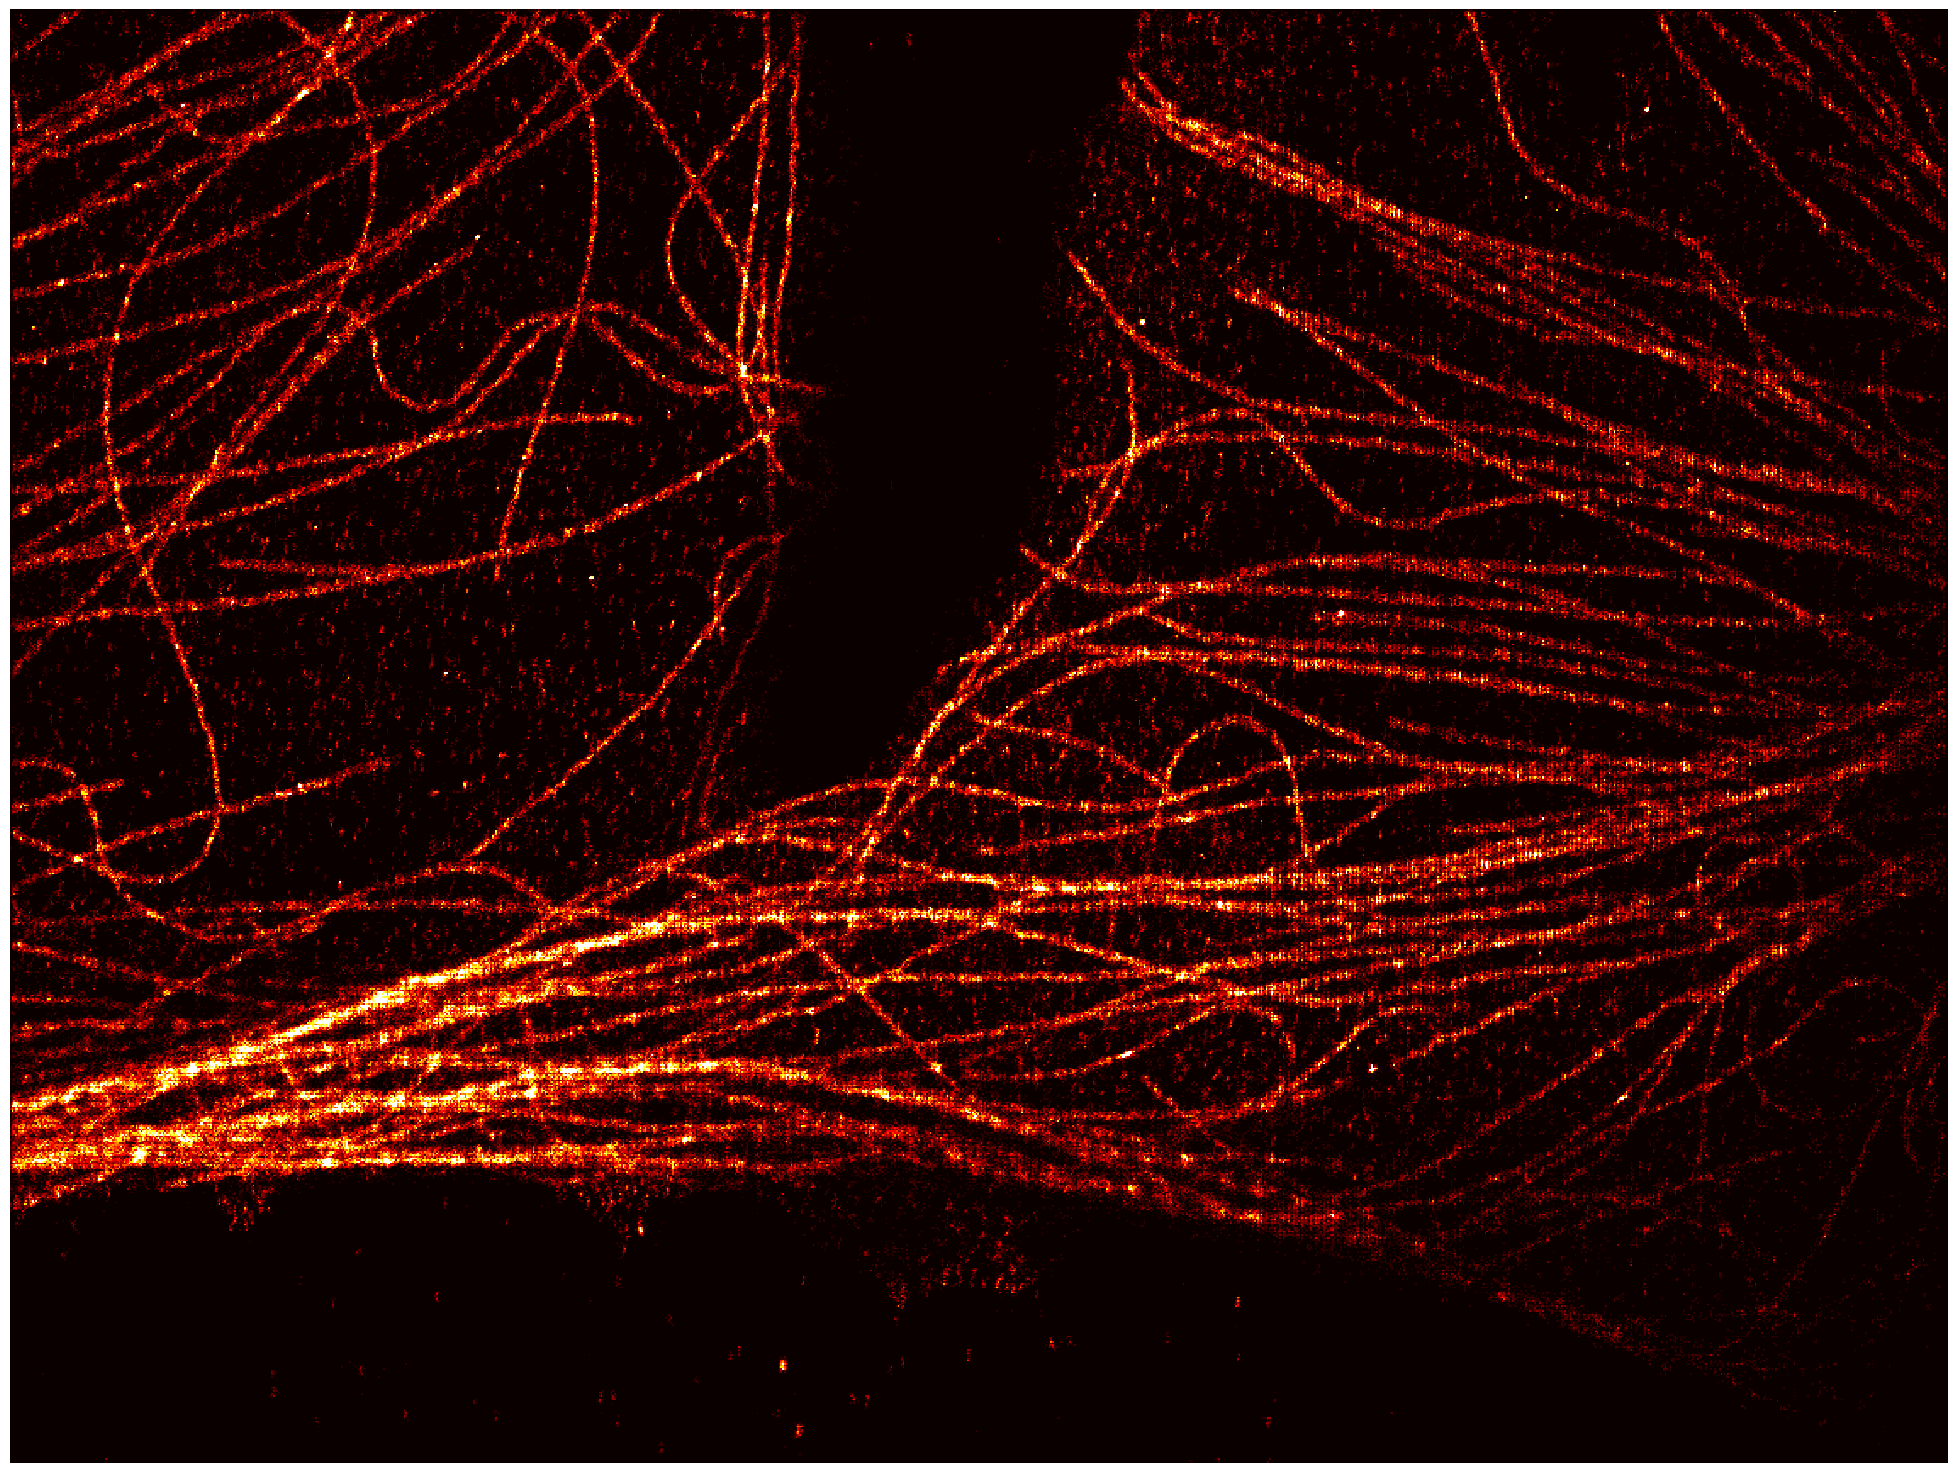

In [147]:
plt.figure(figsize=(25, 25))
plt.axis('off')
plt.imshow(hist_2d_bin.T, vmax=20,
           cmap='hot', interpolation='none')
plt.savefig('/home/smlm-workstation/event-smlm/event-smlm-localization/figures/FRC_2.png', bbox_inches = 'tight', pad_inches = 0)

In [93]:
begin1m = hist_2d.T

In [115]:
last1m = hist_2d.T

In [104]:
from skimage.registration import phase_cross_correlation
detected_shift = phase_cross_correlation(last1m, begin1m, upsample_factor=100)

In [105]:
detected_shift[0]

array([25.02, -2.96])

In [ ]:
sum_corr = last1m + begin1m
plt.figure(figsize=(25, 25))
plt.imshow(sum, vmax=10,
           cmap='gray', interpolation='gaussian')

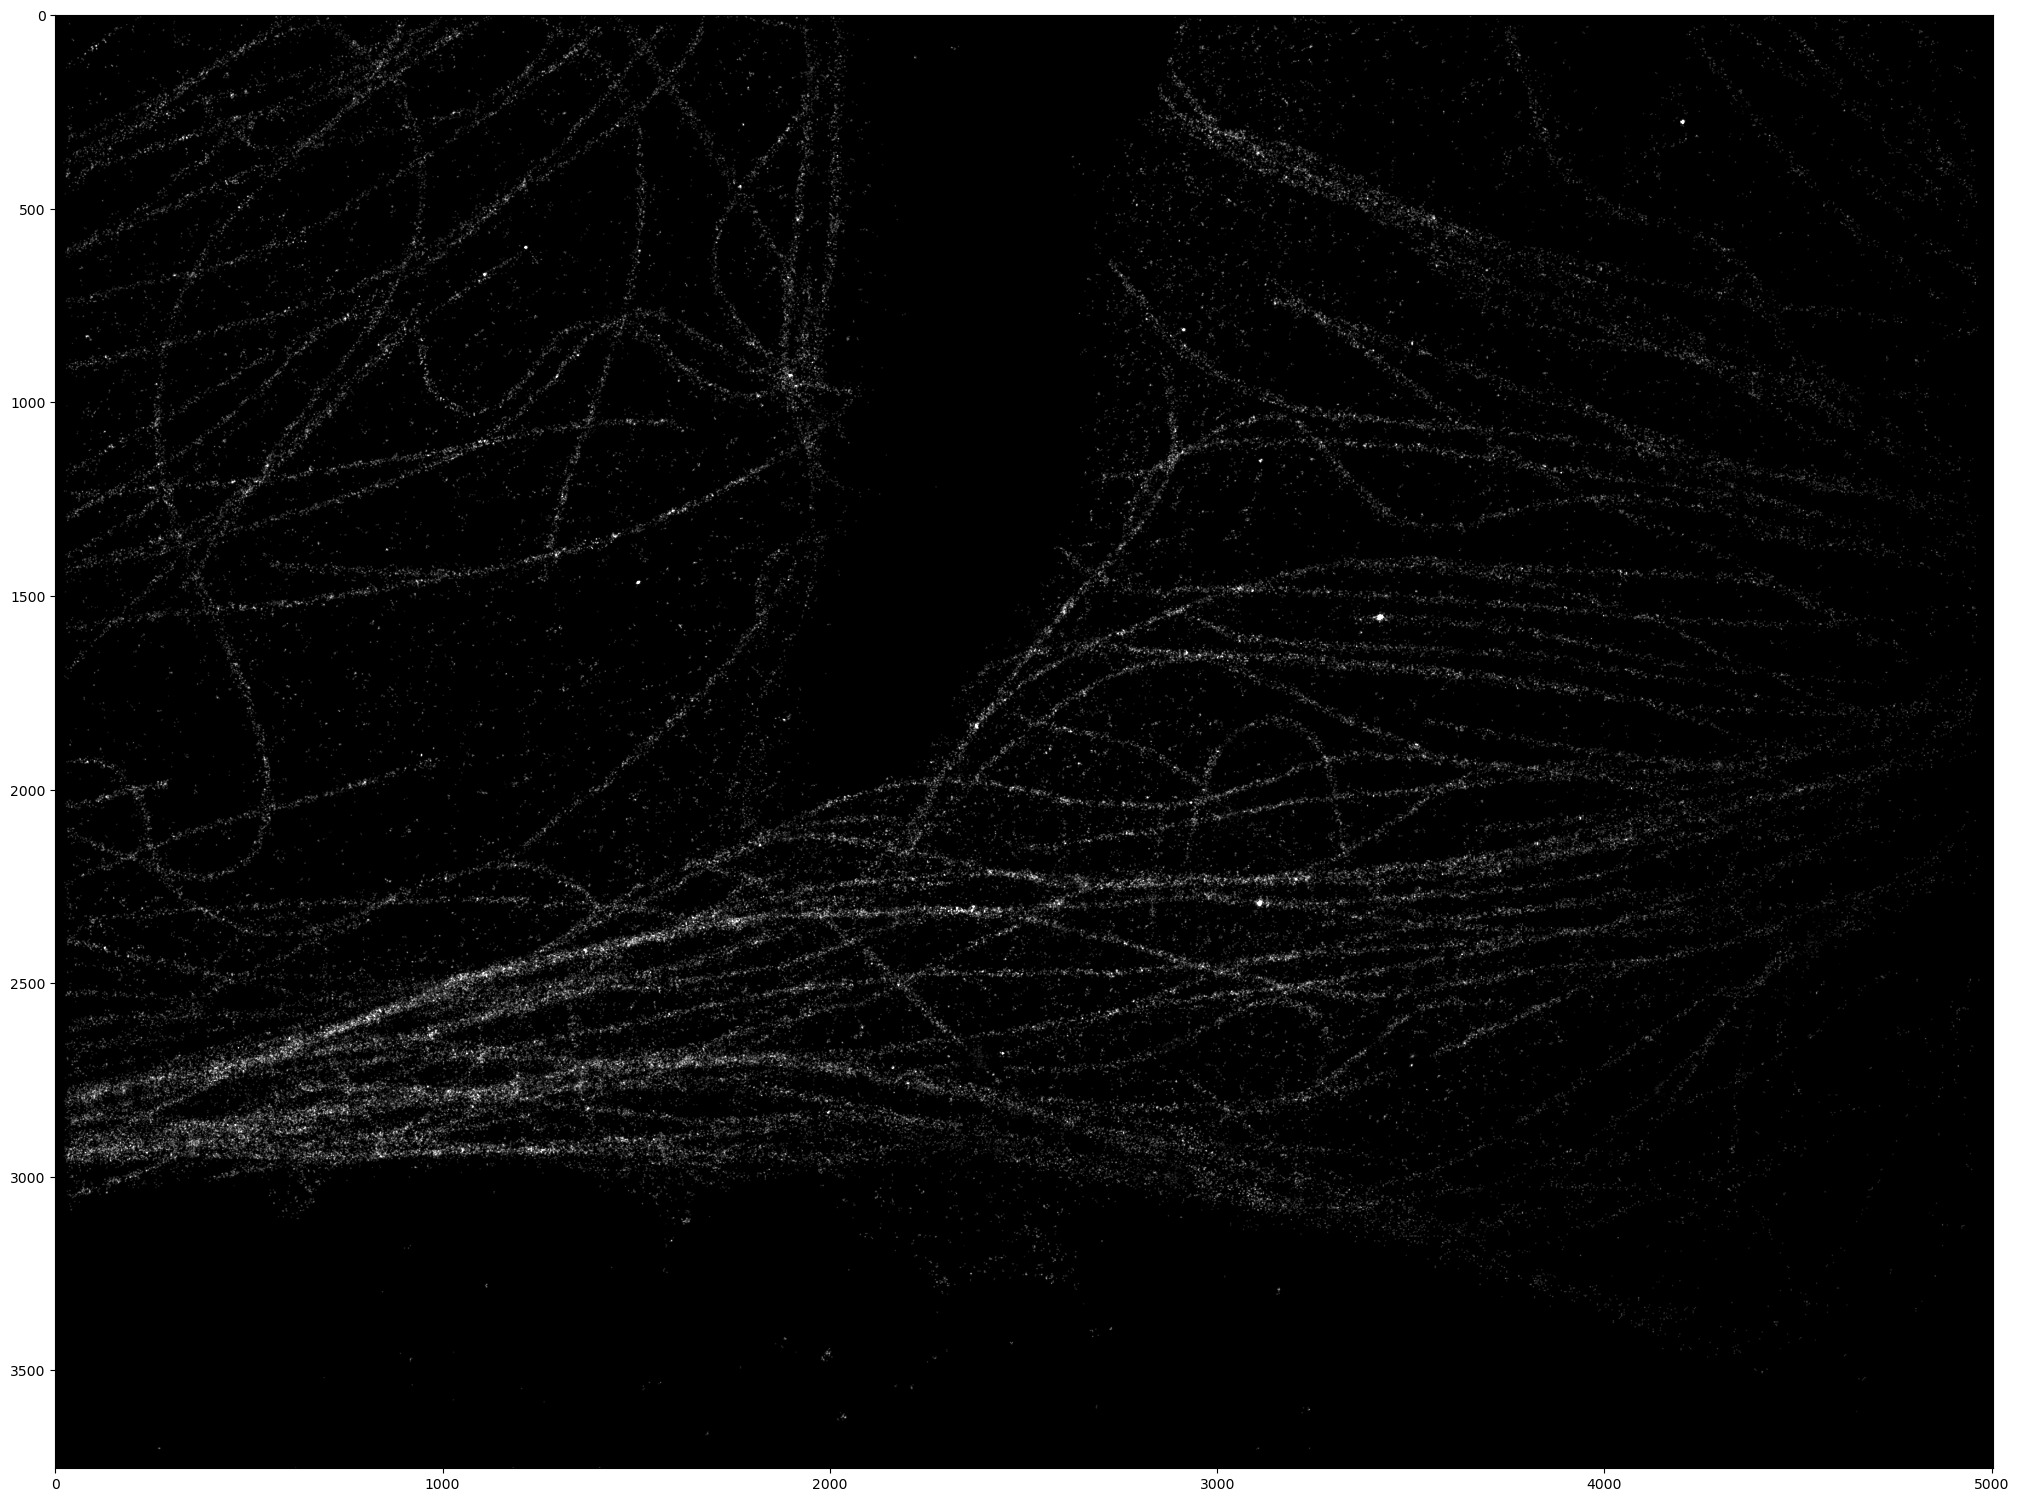

In [116]:
sum = last1m + begin1m
plt.figure(figsize=(25, 25))
plt.imshow(sum, vmax=10,
           cmap='gray', interpolation='gaussian')

# SUperres from events

In [79]:
filepath_events = '/home/smlm-workstation/event-smlm/Evb-SMLM/raw_data/tubulin300x400_5_150.npy'
# filepath_events = '/home/smlm-workstation/event-smlm/Evb-SMLM/raw_data/tubulin300x400.npy'
# events = np.load(filepath_events)
event = events[0]
# events_p = events[events['p']==1]
# events_n = events[events['p']==0]
event[['x','y']]
# event

(130, 20)

In [8]:
# values, counts = np.unique(events_p[['x','y']], return_counts=True)
values, counts = np.unique(events[['x','y']], return_counts=True)

In [66]:
ind = np.argpartition(-counts, kth=37000)[:37000]

In [67]:
k_size = 6
yrange = np.arange(2*k_size+1)*1.
xrange = np.arange(2*k_size+1)*1.

def gaussian_symmetrical(y0, x0, width):
    fX = np.exp(-(xrange-x0)**2/(2.*width**2))
    fY = np.exp(-(yrange-y0)**2/(2.*width**2))
    fY = fY.reshape(len(fY), 1)
    return fY*fX

# values[ind]
hist_2d = np.zeros((int(max_x)*11,
                   int(max_y)*11))
intensities = counts[ind]
i=0
for coord in values[ind]:
    hist_2d[coord[0]*11, coord[1]*11] += (intensities[i])**1.6
    i+=1
histogram_convolved = convolve2d(
    hist_2d, gaussian_symmetrical(k_size, k_size, 6), mode='same')

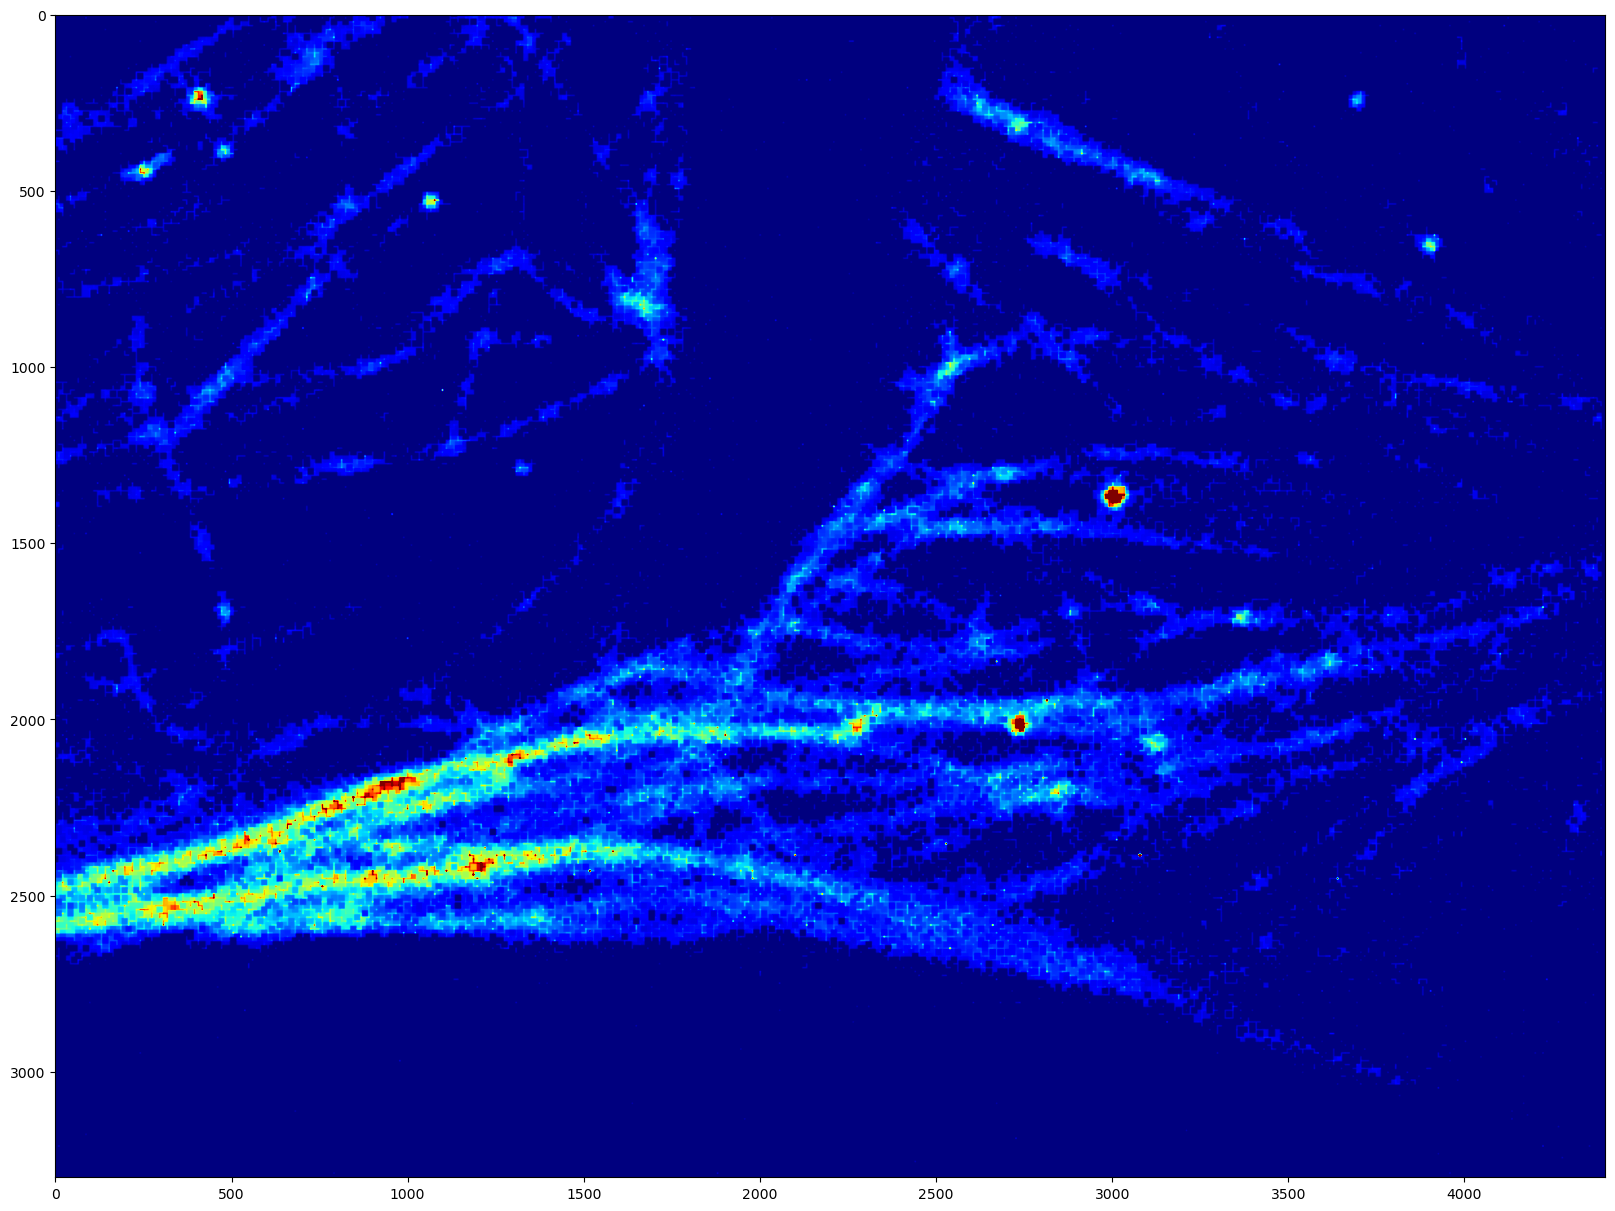

In [68]:
from skimage.morphology import erosion, dilation, disk, octagon
dilated = dilation(histogram_convolved, np.ones((2,2)))
dilated = dilation(dilated, np.ones((1, 1)))
eroded = erosion(dilated, np.ones((3,3)))
eroded = erosion(eroded, np.ones((3, 3)))
eroded = erosion(eroded, np.ones((3, 3)))
eroded = erosion(eroded, np.ones((3, 3)))
eroded = erosion(eroded, np.ones((3, 3)))

eroded /= np.mean(eroded)
plt.figure(figsize=(20, 20))
plt.imshow(eroded.T, norm='linear', vmax=25,
           cmap='jet', interpolation='gaussian')


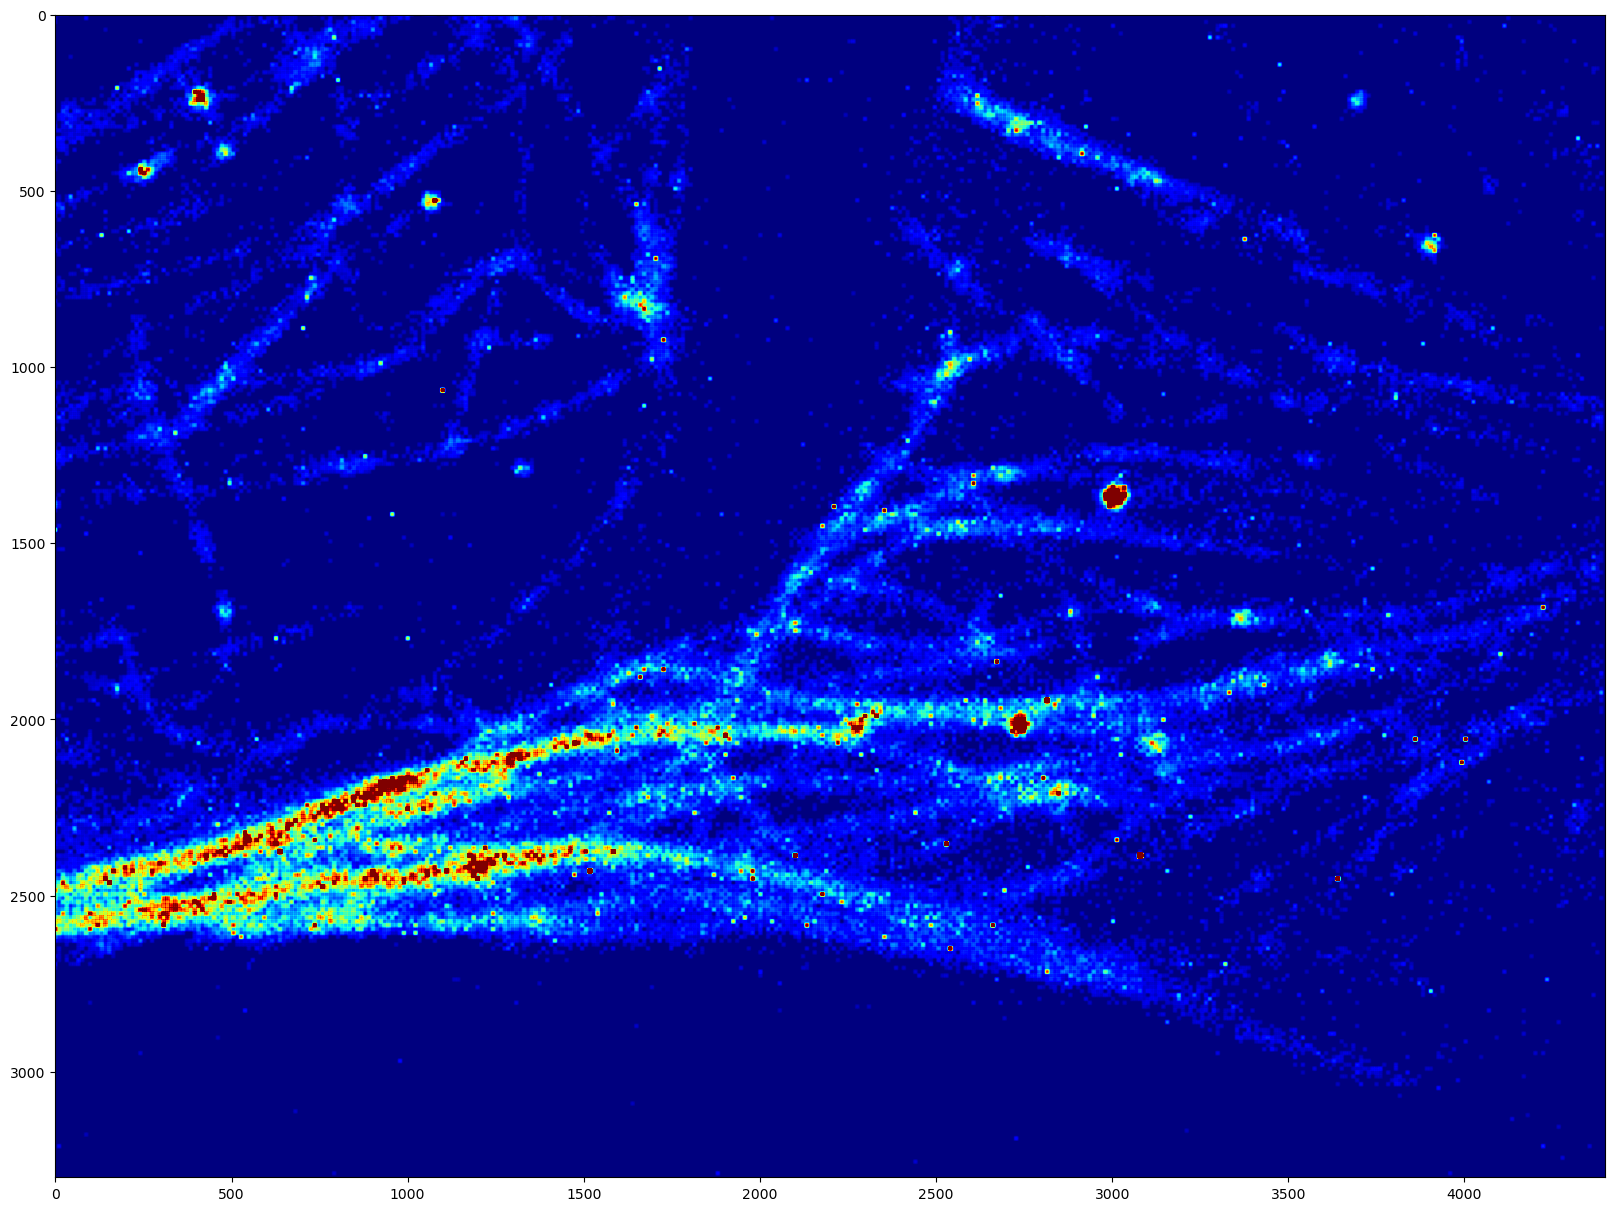

In [61]:
# The result of the linear interpolation visualisation can be plotted.
histogram_convolved /= np.mean(histogram_convolved) 
plt.figure(figsize=(20, 20))
plt.imshow(histogram_convolved.T, vmax=19,
           cmap='jet', interpolation='gaussian')